# Sequential update of worksheet files
This worksheet exports other worksheets to .sage files in order to save time when executing every particular worksheet. It can also be used to reproduce all computational results with one click, just click on `Cell` -> `Run All`.
This converts all other worksheets to .sage files and them loads them into the current worksheet, which executes all the code in each worksheet. This can take tens of minutes! 

In [1]:
import json   # for reading notebook metadata
def fun_export_ipynb(worksheet, folder):
    '''
    Exports worksheet.ipynb to a .py or .sage depending on kernel.
    Example:
    fun_export_ipynb('Worksheet_setup', 'temp/')
    Need to import json before using this function. Unless option output=True is given,
    each line of text has a semicolon added in the .py file, preventing any output.
    '''
    str1 = 'jupyter nbconvert  --to=python \'' + worksheet+'.ipynb\''
    print str1
    print 'Exporting specified worksheet to .py file...'
    
    try:
        retcode = os.system(str1)
        if retcode < 0:
            print >>sys.stderr, "nbconvert was terminated by signal", -retcode
        else:
            print >>sys.stderr, "nbconvert returned", retcode
    except OSError as e:
        print >>sys.stderr, "Execution failed:", e
        print >>sys.stderr, "Trying ipython nbconvert instead..."
        str1 = 'ipython nbconvert  --to script \'' + worksheet+'.ipynb\''    # for new version of python
        try:      
            retcode = os.system(str1)
            if retcode < 0:
                print >>sys.stderr, "nbconvert was terminated by signal", -retcode
            else:
                print >>sys.stderr, "nbconvert returned", retcode
        except OSError as e:
            print >>sys.stderr, "Execution failed:", e              

    str1 = worksheet + '.py'
    
    print 'Checking if specified ipynb file was run with sage kernel...'
    with open(worksheet+'.ipynb') as data_file:    
        data = json.load(data_file)
    
    if data['metadata']['kernelspec']['name'][0:4] == 'sage':
        print 'Renaming .py file to .sage if notebook kernel was sage (to avoid exponent error)'
        str2 = folder + worksheet + '.sage'
        os.rename(str1, str2)

In [2]:
def fun_export_load_ipynb(list_wsnames, folder, load1 = True):
    '''
    Exports worksheet 'name' to .sage file in specified folder and then imports it 
    into current worksheet, executing all code and displaying its output. 
    If you only want to export but not load the files, set option load1 = False.
    '''
    for name in list_wsnames:
        fun_export_ipynb(name, folder)
        print 'created file ' + folder + name
        if load1:
            load(folder + name + '.sage')
            print 'imported file ' + folder + name

In [3]:
fun_export_load_ipynb(['Worksheet_setup'], 'temp/')

jupyter nbconvert  --to=python 'Worksheet_setup.ipynb'
Exporting specified worksheet to .py file...


nbconvert returned 0


Checking if specified ipynb file was run with sage kernel...
Renaming .py file to .sage if notebook kernel was sage (to avoid exponent error)
created file temp/Worksheet_setup
imported file temp/Worksheet_setup


/home/sschyman/Programs/sage-upgrade/local/lib/python2.7/site-packages/traitlets/traitlets.py:809: DeprecationWarning: A parent of InlineBackend._config_changed has adopted the new (traitlets 4.1) @observe(change) API
  clsname, change_or_name), DeprecationWarning)


## Executing all worksheets in the correct order to reproduce figures saved in subfolder /figures
Below, list_wsnames contains a list of worksheet names that need to be executed in the specified order to recreate all figures in the directory /figures. This will take a few minutes. If you only want to export the worksheets as .sage files to the temp folder, just change `load1 = True` to `load1 = False`. This will make sure that the worksheet load up-to-date code, when they load the respective .sage files. 

jupyter nbconvert  --to=python 'leaf_enbalance_eqs.ipynb'
Exporting specified worksheet to .py file...


nbconvert returned 0


Checking if specified ipynb file was run with sage kernel...
Renaming .py file to .sage if notebook kernel was sage (to avoid exponent error)
created file temp/leaf_enbalance_eqs


R_s == E_l + H_l + R_ll

R_ll == (T_l^4 - T_w^4)*a_sh*epsilon_l*sigm

H_l == -(T_a - T_l)*a_sh*h_c

E_l == E_lmol*M_w*lambda_E

M_w*lambda_E

44100.0000000000kilogram*meter^2/(mole*second^2)


E_lmol == -(C_wa - C_wl)*g_tw

g_tw == g_bw*g_sw/(g_bw + g_sw)

g_tw == (1/(1/g_bw + 1/g_sw))

g_bw == D_va*Sh/L_l

g_bw == a_s*h_c/(Le^(2/3)*c_pa*rho_a)

meter/second == meter/second


Le == alpha_a/D_va

C_wl == P_wl/(R_mol*T_l)

mole/meter^3 == mole/meter^3


P_wl == 611*e^(-1/273*M_w*lambda_E*(273/T_l - 1)/R_mol)

E_lmol == -(P_wa - P_wl)*g_twmol/P_a

mole/(meter^2*second) == mole/(meter^2*second)


g_twmol == -(P_a*P_wl*T_a - P_a*P_wa*T_l)*g_tw/((P_wa - P_wl)*R_mol*T_a*T_l)

mole/(meter^2*second) == mole/(meter^2*second)


g_twmol == P_a*g_tw/(R_mol*T_a)

mole/(meter^2*second) == mole/(meter^2*second)


C_wa == P_wa/(R_mol*T_a)

mole/meter^3 == mole/meter^3


h_c == Nu*k_a/L_l

kilogram/(kelvin*second^3) == kilogram/(kelvin*second^3)


Re == L_l*v_w/nu_a

1 == 1


Gr == L_l^3*g*(rho_a - rho_al)/(nu_a^2*rho_al)

1 == 1


Nu == Pr^(1/3)*(-0.0370000000000000*(Re + Re_c - 1/2*abs(Re - Re_c))^(4/5) + 0.0370000000000000*Re^(4/5) + 0.664000000000000*sqrt(Re + Re_c - 1/2*abs(Re - Re_c)))

rho_a == (M_N2*P_N2 + M_O2*P_O2 + M_w*P_wa)/(R_mol*T_a)

kilogram/meter^3 == kilogram/meter^3


P_a == P_N2 + P_O2 + P_wa

kilogram/(meter*second^2) == kilogram/(meter*second^2)


P_O2 == 21/100*P_a - 21/100*P_wa

kilogram/(meter*second^2) == kilogram/(meter*second^2)


P_N2 == 79/100*P_a - 79/100*P_wa

rho_a == 1/100*(79*M_N2*(P_a - P_wa) + 21*M_O2*(P_a - P_wa) + 100*M_w*P_wa)/(R_mol*T_a)

(1.13400000000000e-7)*T_l^4 - 900.306522304087
C_wa            1.29441408346663
C_wl            1.91570361006325
D_va            0.0000248765000000000
E_l             185.424519010311
E_lmol          0.00420463761928142
H_l             325.157459266011
L_l             0.0300000000000000
Le              0.888469037042992
M_N2            0.0280000000000000
M_O2            0.0320000000000000
M_w             0.0180000000000000
Nu              26.1863624980041
P_a             101325         
P_wa            3212.56734153661
P_wl            4868.42309771766
Pr              0.710000000000000
R_ll            89.4180217236781
R_mol           8.31447200000000
R_s             600            
Re              1927.40122068744
Re_c            3000           
T_a             298.500000000000
T_l             305.650648423  
T_w             298.500000000000
a_s             1.00000000000000
a_sh            2              
alpha_a         0.0000221020000000000
c_pa            1010           
epsilon_l   

E_l == -H_l - R_ll + R_s

jupyter nbconvert  --to=python 'leaf_enbalance_eqs.ipynb'
Exporting specified worksheet to .py file...


nbconvert returned 0


Checking if specified ipynb file was run with sage kernel...
Renaming .py file to .sage if notebook kernel was sage (to avoid exponent error)
imported file temp/leaf_enbalance_eqs
jupyter nbconvert  --to=python 'E_PM_eqs.ipynb'
Exporting specified worksheet to .py file...


nbconvert returned 0


Checking if specified ipynb file was run with sage kernel...
Renaming .py file to .sage if notebook kernel was sage (to avoid exponent error)
created file temp/E_PM_eqs


E_w == -(P_wa - P_wl)*f_u

beta_B == (T_a - T_l)*gamma_v/(P_wa - P_wl)

Delta_eTa == (P_was - P_wl)/(T_a - T_l)

P_was == 611*e^(-1/273*M_w*lambda_E*(273/T_a - 1)/R_mol)

Delta_eTa == 611*M_w*lambda_E*e^(-1/273*M_w*lambda_E*(273/T_a - 1)/R_mol)/(R_mol*T_a^2)

beta_B == (P_was - P_wl)*gamma_v/(Delta_eTa*(P_wa - P_wl))

E_w == -(R_ll - R_s)/(beta_B + 1)

[
[P_wl == (Delta_eTa*P_wa*f_u + P_was*f_u*gamma_v - Delta_eTa*R_ll + Delta_eTa*R_s)/(Delta_eTa*f_u + f_u*gamma_v), E_w == -((P_wa - P_was)*f_u*gamma_v + Delta_eTa*R_ll - Delta_eTa*R_s)/(Delta_eTa + gamma_v), beta_B == -((P_wa - P_was)*f_u - R_ll + R_s)*gamma_v/((P_wa - P_was)*f_u*gamma_v + Delta_eTa*R_ll - Delta_eTa*R_s)]
]


P_wl == (Delta_eTa*P_wa*f_u + P_was*f_u*gamma_v - Delta_eTa*R_ll + Delta_eTa*R_s)/((Delta_eTa + gamma_v)*f_u)

E_w == -((P_wa - P_was)*f_u*gamma_v + Delta_eTa*R_ll - Delta_eTa*R_s)/(Delta_eTa + gamma_v)

T_l == (T_a*f_u*gamma_v + (Delta_eTa*T_a + P_wa - P_was)*f_u - R_ll + R_s)/(Delta_eTa*f_u + f_u*gamma_v)

T_l == (T_a*f_u*gamma_v + (Delta_eTa*T_a + P_wa - 611*e^(-1/273*M_w*lambda_E*(273/T_a - 1)/R_mol))*f_u - R_ll + R_s)/(Delta_eTa*f_u + f_u*gamma_v)

T_l == ((Delta_eTa*f_u + f_u*gamma_v)*T_a + P_wa*f_u - P_was*f_u - R_ll + R_s)/(Delta_eTa*f_u + f_u*gamma_v)

kelvin == kelvin


P_wl == (P_was*f_u*gamma_v + (P_wa*f_u - R_ll + R_s)*Delta_eTa)/(Delta_eTa*f_u + f_u*gamma_v)

T_l == 273*M_w*lambda_E/(M_w*lambda_E + 273*R_mol*log(611*(Delta_eTa*f_u + f_u*gamma_v)/(Delta_eTa*P_wa*f_u + P_was*f_u*gamma_v - Delta_eTa*R_ll + Delta_eTa*R_s)))

E_l == -(P_wa - P_wl)*S*f_u

H_l == -(T_a - T_l)*f_u*gamma_v

H_l == -(P_was - P_wl)*f_u*gamma_v/Delta_eTa

T_l == (Delta_eTa*T_a - P_was + P_wl)/Delta_eTa

H_l == -(P_was - P_wl)*f_u*gamma_v/Delta_eTa

E_l == -(Delta_eTa*(R_ll - R_s)*S + (P_wa*S - P_was*S)*f_u*gamma_v)/(Delta_eTa*S + gamma_v)

kilogram/second^3 == kilogram/second^3


H_l == ((P_wa*S - P_was*S)*f_u - R_ll + R_s)*gamma_v/(Delta_eTa*S + gamma_v)

kilogram/second^3 == kilogram/second^3


P_wl == (Delta_eTa*P_wa*S*f_u + P_was*f_u*gamma_v - Delta_eTa*(R_ll - R_s))/(Delta_eTa*S*f_u + f_u*gamma_v)

kilogram/(meter*second^2) == kilogram/(meter*second^2)


T_l == (P_wa*S*f_u - P_was*S*f_u + (Delta_eTa*S*f_u + f_u*gamma_v)*T_a - R_ll + R_s)/(Delta_eTa*S*f_u + f_u*gamma_v)

S == M_w*g_twmol*lambda_E/(P_a*f_u)

H_l == -(T_a - T_l)*f_u*gamma_v

H_l == -(T_a - T_l)*a_sh*h_c

gamma_v == a_sh*h_c/f_u

E_l == -(P_wa - P_wl)*S*f_u

E_w == -M_w*(P_wa - P_wl)*g_bw*lambda_E/(R_mol*T_a)

f_u == M_w*g_bw*lambda_E/(R_mol*T_a)

gamma_v == a_sh*h_c/f_u

gamma_v == Le^(2/3)*R_mol*T_a*a_sh*c_pa*rho_a/(M_w*a_s*lambda_E)

S == g_sw/(g_bw + g_sw)

E_l == -((M_w*P_wa - M_w*P_was)*gamma_v*lambda_E + (Delta_eTa*R_ll*R_mol - Delta_eTa*R_mol*R_s)*T_a*r_bw)/(R_mol*T_a*gamma_v*r_sw + (Delta_eTa*R_mol*T_a + R_mol*T_a*gamma_v)*r_bw)

E_l == -((M_w*P_wa - M_w*P_was)*Le^(2/3)*a_sh*c_pa*g_bw*g_sw*lambda_E*rho_a + (Delta_eTa*M_w*R_ll - Delta_eTa*M_w*R_s)*a_s*g_sw*lambda_E)/(Delta_eTa*M_w*a_s*g_sw*lambda_E + (R_mol*T_a*a_sh*c_pa*g_bw + R_mol*T_a*a_sh*c_pa*g_sw)*Le^(2/3)*rho_a)

E_l == -((M_w*P_wa - M_w*P_was)*gamma_v*lambda_E + (Delta_eTa*R_ll*R_mol - Delta_eTa*R_mol*R_s)*T_a*r_bw)/(R_mol*T_a*gamma_v*r_sw + (Delta_eTa*R_mol*T_a + R_mol*T_a*gamma_v)*r_bw)

E_l == -((M_w*P_wa - M_w*P_was)*Le^(2/3)*a_sh*c_pa*lambda_E*rho_a + (Delta_eTa*M_w*R_ll - Delta_eTa*M_w*R_s)*a_s*lambda_E*r_bw)/(Delta_eTa*M_w*a_s*lambda_E*r_bw + (R_mol*T_a*a_sh*c_pa*r_bw + R_mol*T_a*a_sh*c_pa*r_sw)*Le^(2/3)*rho_a)

E_l == -((M_w*P_wa - M_w*P_was)*Le^(2/3)*a_sh*c_pa*g_bw*g_sw*lambda_E*rho_a + (Delta_eTa*M_w*R_ll - Delta_eTa*M_w*R_s)*a_s*g_sw*lambda_E)/(Delta_eTa*M_w*a_s*g_sw*lambda_E + (R_mol*T_a*a_sh*c_pa*g_bw + R_mol*T_a*a_sh*c_pa*g_sw)*Le^(2/3)*rho_a)

f_u == c_pa*rho_a/(gamma_v*r_a)

E_w == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(Delta_eTa + gamma_v)

gamma_v == gamma_v*(r_s/r_a + 1)

E_l == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(gamma_v*(r_s/r_a + 1) + Delta_eTa)

gamma_v == gamma_v*n_MU*(r_s/r_a + 1)

E_l == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(gamma_v*n_MU*(r_s/r_a + 1) + Delta_eTa)

gamma_v == P_a*c_pa/(epsilon*lambda_E)

epsilon == M_w*P_a/(R_mol*T_a*rho_a)

epsilon == 100*M_w*P_a/(79*M_N2*(P_a - P_wa) + 21*M_O2*(P_a - P_wa) + 100*M_w*P_wa)

H_l == -(T_a - T_l)*a_sh*h_c

E_l == -(P_wa - P_wl)*a_s*epsilon*lambda_E*rho_a/(P_a*(r_s + r_v))

kilogram/second^3 == kilogram/second^3


H_l == -(T_a - T_l)*a_sh*c_pa*rho_a/r_a

E_l == -M_w*g_tw*lambda_E*(P_wa/(R_mol*T_a) - P_wl/(R_mol*T_l))

r_v == a_s/g_bw

E_l == -M_w*g_tw*lambda_E*(P_wa/(R_mol*T_a) - P_wl/(R_mol*T_l))

E_l == -M_w*(P_wa - P_wl)*a_s*lambda_E/(R_mol*T_a*(r_s + r_v))

r_s == a_s/g_sw

r_a == c_pa*rho_a/h_c

E_l == -(P_wa - P_wl)*c_E

kilogram/second^3 == kilogram/second^3


H_l == -(T_a - T_l)*c_H

H_l == -(T_a - T_l)*c_E*gamma_v

Delta_eTa == (P_was - P_wl)/(T_a - T_l)

H_l == -(P_was - P_wl)*c_E*gamma_v/Delta_eTa

kilogram/second^3 == kilogram/second^3


E_l == -((P_wa - P_was)*c_E*c_H + (Delta_eTa*R_ll - Delta_eTa*R_s)*c_E)/(Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3
E_{l} = -\frac{{\left({P_{wa}} - {P_{was}}\right)} c_{E} c_{H} + {\left({\Delta_{eTa}} {R_{ll}} - {\Delta_{eTa}} R_{s}\right)} c_{E}}{{\Delta_{eTa}} c_{E} + c_{H}}


H_l == ((P_wa - P_was)*c_E - R_ll + R_s)*c_H/(Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3
H_{l} = \frac{{\left({\left({P_{wa}} - {P_{was}}\right)} c_{E} - {R_{ll}} + R_{s}\right)} c_{H}}{{\Delta_{eTa}} c_{E} + c_{H}}


P_wl == (Delta_eTa*P_wa*c_E - Delta_eTa*R_ll + Delta_eTa*R_s + P_was*c_H)/(Delta_eTa*c_E + c_H)

kilogram/(meter*second^2) == kilogram/(meter*second^2)
{P_{wl}} = \frac{{\Delta_{eTa}} {P_{wa}} c_{E} - {\Delta_{eTa}} {R_{ll}} + {\Delta_{eTa}} R_{s} + {P_{was}} c_{H}}{{\Delta_{eTa}} c_{E} + c_{H}}


T_l == (Delta_eTa*T_a*c_E + P_wa*c_E - P_was*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)

kelvin == kelvin


T_l == ((Delta_eTa*T_a + P_wa - P_was)*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)

T_l == T_a + ((P_wa - P_was)*c_E - R_ll + R_s)/(Delta_eTa*c_E + c_H)

P_wl == 611*e^(-1/273*M_w*lambda_E*(273/T_l - 1)/R_mol)

T_l == 273*M_w*lambda_E/(M_w*lambda_E + 273*R_mol*log(611*(Delta_eTa*c_E + c_H)/(Delta_eTa*P_wa*c_E - Delta_eTa*R_ll + Delta_eTa*R_s + P_was*c_H)))

c_E == M_w*g_twmol*lambda_E/P_a

meter/second == meter/second


c_H == a_sh*h_c

H_l == ((M_w*P_wa - M_w*P_was)*a_sh*g_twmol*h_c*lambda_E - (P_a*R_ll - P_a*R_s)*a_sh*h_c)/(Delta_eTa*M_w*g_twmol*lambda_E + P_a*a_sh*h_c)

E_l == -((M_w*P_wa - M_w*P_was)*a_sh*g_twmol*h_c + (Delta_eTa*M_w*R_ll - Delta_eTa*M_w*R_s)*g_twmol)*lambda_E/(Delta_eTa*M_w*g_twmol*lambda_E + P_a*a_sh*h_c)

T_l == (P_a*T_a*a_sh*h_c + (Delta_eTa*M_w*T_a + M_w*P_wa - M_w*P_was)*g_twmol*lambda_E - P_a*R_ll + P_a*R_s)/(Delta_eTa*M_w*g_twmol*lambda_E + P_a*a_sh*h_c)

$ g $ $ v_{w} $ $ {P_{wa}} $ $ {a_{sh}} $ $ M_{O_{2}} $ $ T_{a} $ $ {R_{mol}} $ $ T_{w} $ $ R_{s} $ $ {c_{pa}} $ $ M_{N_{2}} $ $ \epsilon_{l} $ $ {\sigma} $ $ a_{s} $ $ P_{a} $ $ {N_{Pr}} $ $ {N_{Re_c}} $ $ M_{w} $ $ \lambda_{E} $ $ \epsilon $ $ {g_{sw}} $ $ L_{l} $ 
$ g $ $ v_{w} $ $ {P_{wa}} $ $ {a_{sh}} $ $ M_{O_{2}} $ $ T_{a} $ $ {R_{mol}} $ $ T_{w} $ $ R_{s} $ $ {c_{pa}} $ $ M_{N_{2}} $ $ \epsilon_{l} $ $ {\sigma} $ $ a_{s} $ $ P_{a} $ $ {N_{Pr}} $ $ {N_{Re_c}} $ $ M_{w} $ $ \lambda_{E} $ $ \epsilon $ $ {g_{sw}} $ $ L_{l} $ 
T_l = 305.650648423
E_l = 185.424519010311
H_l = 325.157459266011
R_ll = 89.4180217236781
Direct estimates: 
E_l == 201.520517691209
H_l == 398.479482308791
T_l == 307.263098002106
P_wl == 4888.37878666472
Using estimated T_l: 
5332.58270455183
E_l == 254.937149826832
H_l == 398.479482308791
0 == 110.468903558398
Using estimated T_l only to calculate R_ll: 
E_l == 164.417599968095
H_l == 325.113496473507
307.263098002106 == 305.649681621994
Using 1 iteration t

T_l == 273*M_w*lambda_E/(M_w*lambda_E + 273*R_mol*log(611*((Le*P_wa - Le*P_wl)*Le^(1/3)*R_mol*T_a*T_l*a_sh*c_pa^2*g_sw^2*h_c*rho_a^2 + (P_wa - P_wl)*R_mol*T_a*T_l*a_s^2*a_sh*h_c^3 - (Delta_eTa*M_w*P_wl*T_a - Delta_eTa*M_w*P_wa*T_l)*a_s^2*g_sw*h_c^2*lambda_E + (2*(P_wa - P_wl)*R_mol*T_a*T_l*a_s*a_sh*c_pa*g_sw*h_c^2 - (Delta_eTa*M_w*P_wl*T_a - Delta_eTa*M_w*P_wa*T_l)*a_s*c_pa*g_sw^2*h_c*lambda_E)*Le^(2/3)*rho_a)/((P_wa*P_was - P_was*P_wl)*R_mol*T_a*T_l*a_s^2*a_sh*h_c^3 - ((Delta_eTa*P_wa - Delta_eTa*P_wl)*R_ll*R_mol - (Delta_eTa*P_wa - Delta_eTa*P_wl)*R_mol*R_s)*T_a*T_l*a_s^2*h_c^2 - (Delta_eTa*M_w*P_wa*P_wl*T_a - Delta_eTa*M_w*P_wa^2*T_l)*a_s^2*g_sw*h_c^2*lambda_E + ((Le*P_wa*P_was - Le*P_was*P_wl)*R_mol*T_a*T_l*a_sh*c_pa^2*g_sw^2*h_c - ((Delta_eTa*Le*P_wa - Delta_eTa*Le*P_wl)*R_ll*R_mol - (Delta_eTa*Le*P_wa - Delta_eTa*Le*P_wl)*R_mol*R_s)*T_a*T_l*c_pa^2*g_sw^2)*Le^(1/3)*rho_a^2 + (2*(P_wa*P_was - P_was*P_wl)*R_mol*T_a*T_l*a_s*a_sh*c_pa*g_sw*h_c^2 - 2*((Delta_eTa*P_wa - Delta_eTa*P_wl)*R_ll*R_mol - (Delta_eTa*P_wa - Delta_eTa*P_wl)*R_mol*R_s)*T_a*T_l*a_s*c_pa*g_sw*h_c - (Delta_eTa*M_w*P_wa*P_wl*T_a - Delta_eTa*M_w*P_wa^2*T_l)*a_s*c_pa*g_sw^2*h_c*lambda_E)*Le^(2/3)*rho_a)))

E_l == -(((M_w*P_wa - M_w*P_was)*P_wl*T_a - (M_w*P_wa^2 - M_w*P_wa*P_was)*T_l)*a_sh*g_bw*g_sw*h_c + ((Delta_eTa*M_w*P_wl*R_ll - Delta_eTa*M_w*P_wl*R_s)*T_a - (Delta_eTa*M_w*P_wa*R_ll - Delta_eTa*M_w*P_wa*R_s)*T_l)*g_bw*g_sw)*lambda_E/((Delta_eTa*M_w*P_wl*T_a - Delta_eTa*M_w*P_wa*T_l)*g_bw*g_sw*lambda_E - ((P_wa - P_wl)*R_mol*T_a*T_l*a_sh*g_bw + (P_wa - P_wl)*R_mol*T_a*T_l*a_sh*g_sw)*h_c)

E_l == -(P_wa - P_wl)*c_E

H_l == -(T_a - T_l)*c_H

gamma_v == c_H/c_E

Delta_eTa == (P_was - P_wl)/(T_a - T_l)

E_l == -(P_wa*c_H - P_wl*c_H)/gamma_v

kilogram/second^3 == kilogram/second^3


E_l == -(Delta_eTa*T_a - Delta_eTa*T_l + P_wa - P_was)*c_H/gamma_v

kilogram/second^3 == kilogram/second^3


E_l == -((P_wa - P_was)*c_E*c_H + (Delta_eTa*R_ll - Delta_eTa*R_s)*c_E)/(Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3
E_{l} = -\frac{{\left({P_{wa}} - {P_{was}}\right)} c_{E} c_{H} + {\left({\Delta_{eTa}} {R_{ll}} - {\Delta_{eTa}} R_{s}\right)} c_{E}}{{\Delta_{eTa}} c_{E} + c_{H}}


H_l == ((P_wa - P_was)*c_E - R_ll + R_s)*c_H/(Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3
H_{l} = \frac{{\left({\left({P_{wa}} - {P_{was}}\right)} c_{E} - {R_{ll}} + R_{s}\right)} c_{H}}{{\Delta_{eTa}} c_{E} + c_{H}}


T_l == ((Delta_eTa*T_a + P_wa - P_was)*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)

kelvin == kelvin
T_{l} = \frac{{\left({\Delta_{eTa}} T_{a} + {P_{wa}} - {P_{was}}\right)} c_{E} + T_{a} c_{H} - {R_{ll}} + R_{s}}{{\Delta_{eTa}} c_{E} + c_{H}}
0 == 0
0 == 0
0 == 0
[
[E_l == -(Delta_eTa*(R_ll - R_s)*c_E + (P_wa*c_E - P_was*c_E)*c_H)/(Delta_eTa*c_E + c_H), H_l == (P_wa*c_E - P_was*c_E - R_ll + R_s)*c_H/(Delta_eTa*c_E + c_H), P_wl == ((P_wa*c_E - R_ll + R_s)*Delta_eTa + P_was*c_H)/(Delta_eTa*c_E + c_H), T_l == (Delta_eTa*T_a*c_E + P_wa*c_E - P_was*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)]
]


E_l == -(Delta_eTa*(R_ll - R_s)*c_E + (P_wa*c_E - P_was*c_E)*c_H)/(Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3
E_{l} = -\frac{{\Delta_{eTa}} {\left({R_{ll}} - R_{s}\right)} c_{E} + {\left({P_{wa}} c_{E} - {P_{was}} c_{E}\right)} c_{H}}{{\Delta_{eTa}} c_{E} + c_{H}}


H_l == (P_wa*c_E - P_was*c_E - R_ll + R_s)*c_H/(Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3
H_{l} = \frac{{\left({P_{wa}} c_{E} - {P_{was}} c_{E} - {R_{ll}} + R_{s}\right)} c_{H}}{{\Delta_{eTa}} c_{E} + c_{H}}


P_wl == ((P_wa*c_E - R_ll + R_s)*Delta_eTa + P_was*c_H)/(Delta_eTa*c_E + c_H)

kilogram/(meter*second^2) == kilogram/(meter*second^2)
{P_{wl}} = \frac{{\left({P_{wa}} c_{E} - {R_{ll}} + R_{s}\right)} {\Delta_{eTa}} + {P_{was}} c_{H}}{{\Delta_{eTa}} c_{E} + c_{H}}


T_l == (Delta_eTa*T_a*c_E + P_wa*c_E - P_was*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)

kelvin == kelvin
T_{l} = \frac{{\Delta_{eTa}} T_{a} c_{E} + {P_{wa}} c_{E} - {P_{was}} c_{E} + T_{a} c_{H} - {R_{ll}} + R_{s}}{{\Delta_{eTa}} c_{E} + c_{H}}
0 == 0
0 == 0
0 == 0
[
[E_l == -(Delta_eTa*(R_ll - R_s)*c_E + (P_wa*c_E - P_was*c_E)*c_H)/(Delta_eTa*c_E + c_H), H_l == (P_wa*c_E - P_was*c_E - R_ll + R_s)*c_H/(Delta_eTa*c_E + c_H), P_wl == ((P_wa*c_E - R_ll + R_s)*Delta_eTa + P_was*c_H)/(Delta_eTa*c_E + c_H), T_l == (Delta_eTa*T_a*c_E + P_wa*c_E - P_was*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)]
]


E_l == -(Delta_eTa*(R_ll - R_s)*c_E + (P_wa*c_E - P_was*c_E)*c_H)/(Delta_eTa*c_E + c_H)

H_l == (P_wa*c_E - P_was*c_E - R_ll + R_s)*c_H/(Delta_eTa*c_E + c_H)

P_wl == ((P_wa*c_E - R_ll + R_s)*Delta_eTa + P_was*c_H)/(Delta_eTa*c_E + c_H)

T_l == (Delta_eTa*T_a*c_E + P_wa*c_E - P_was*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)

E_l == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(gamma_v*(r_s/r_a + 1) + Delta_eTa)

r_a == c_pa*rho_a/h_c

gamma_v == P_a*c_pa/(epsilon*lambda_E)

epsilon == M_w*P_a/(R_mol*T_a*rho_a)

E_l == -(P_wa - P_wl)*a_s*epsilon*lambda_E*rho_a/(P_a*(r_s + r_v))

E_l == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(gamma_v*n_MU*(r_s/r_a + 1) + Delta_eTa)

numerical solution: 
T_l = 308.321395271
E_l = 180.542235053942
H_l = 150.521099595469
R_ll = 68.9366653505872
g_bw = 0.0131620455576424
g_tw = 0.00291849206962754
Direct estimates: 
E_l = 198.222104889662
H_l = 201.777895110338
T_l == 310.133484539870
T_l == 310.133484539870
T_l == 309.093414355984
400 == 400.000000000000
Using T_l from eq_Tl_Delta: 
T_l = 310.133484539870
P_wl = 6256.38161942359
E_l = 216.096641092879
H_l = 201.777895110338
R_ll = 93.2413750164809
400 == 511.115911219698
Using T_l from eq_Tl_Delta only to calculate R_ll: 
T_l = 310.133484539870
R_ll = 93.2413750164809
E_l = 169.892070077829
H_l = 136.866554905690
400 == 400.000000000000
Using T_l from eq_Tl_Delta2: 
T_l = 309.093414355984
P_wl = 5906.50495424575
E_l = 198.222104889662
H_l = 172.358447812370
R_ll = 79.2391719599519
400 == 449.819724661984
Using T_l from eq_Tl_Delta2 only to calculate R_ll: 
T_l = 309.093414355984
R_ll = 79.2391719599519
E_l = 174.146435695707
H_l = 146.614392344341
400 == 400.00000000

E_l == -((P_wa - P_was)*f_u*gamma_v + Delta_eTa*R_ll - Delta_eTa*R_s)/(Delta_eTa + gamma_v)

E_w == -((P_wa - P_was)*f_u*gamma_v + Delta_eTa*R_ll - Delta_eTa*R_s)/(Delta_eTa + gamma_v)

E_l == -((P_wa - P_was)*c_pa*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*r_a)/((Delta_eTa + gamma_v)*r_a)

E_w == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(Delta_eTa + gamma_v)

E_l == -((P_wa - P_was)*f_u*gamma_v + Delta_eTa*R_ll - Delta_eTa*R_s)*S/(Delta_eTa*S + gamma_v)

E_l == -(Delta_eTa*(R_ll - R_s)*S + (P_wa*S - P_was*S)*f_u*gamma_v)/(Delta_eTa*S + gamma_v)

E_l == -(Delta_eTa*(R_ll - R_s)*S + (P_wa*S - P_was*S)*f_u*gamma_v)/(Delta_eTa*S + gamma_v)

E_l == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(gamma_v*(r_s/r_a + 1) + Delta_eTa)

E_l == -(P_wa - P_wl)*a_s*epsilon*lambda_E*rho_a/(P_a*(r_s + r_v))

H_l == -(T_a - T_l)*a_sh*c_pa*rho_a/r_a

gamma_v == P_a*c_pa/(epsilon*lambda_E)

E_l == -((P_wa - P_was)*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*epsilon*lambda_E*r_a)/(P_a*c_pa*r_s + (Delta_eTa*epsilon*lambda_E + P_a*c_pa)*r_a)

E_l == -((P_wa - P_was)*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*epsilon*lambda_E*r_a)/(P_a*c_pa*r_s + (Delta_eTa*epsilon*lambda_E + P_a*c_pa)*r_a)

E_l == -((P_wa - P_was)*c_pa*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*r_a)/((Delta_eTa + gamma_v)*r_a + gamma_v*r_s)

E_l == -((P_wa - P_was)*c_pa*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*r_a)/((Delta_eTa + gamma_v)*r_a + gamma_v*r_s)

E_l == -((P_wa - P_was)*a_s*a_sh*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*epsilon*lambda_E*r_a)/(P_a*a_sh*c_pa*r_s + (Delta_eTa*a_s*epsilon*lambda_E + P_a*a_sh*c_pa)*r_a)

kilogram/second^3 == kilogram/second^3


E_l == -((P_wa - P_was)*a_s*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*epsilon*lambda_E*r_a)/(P_a*a_sh*c_pa*r_s + (Delta_eTa*a_s*epsilon*lambda_E + P_a*a_sh*c_pa)*r_a)

E_l == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(Delta_eTa + P_a*a_sh*c_pa*(r_s/r_a + 1)/(a_s*epsilon*lambda_E))

E_l == -((P_wa - P_was)*a_s*a_sh*c_pa*epsilon*lambda_E*rho_a^2/(P_a*(r_a + r_s)*r_a) + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*epsilon*lambda_E*rho_a/(P_a*(r_a + r_s)))/(Delta_eTa*a_s*epsilon*lambda_E*rho_a/(P_a*(r_a + r_s)) + a_sh*c_pa*rho_a/r_a)

E_w == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(Delta_eTa + gamma_v)

gamma_v == c_H/c_E

E_l == -(Delta_eTa*(R_ll - R_s)*c_E + (P_wa*c_E - P_was*c_E)*c_H)/(Delta_eTa*c_E + c_H)

E_l == -(Delta_eTa*(R_ll - R_s)*c_E + (P_wa*c_E - P_was*c_E)*c_H)/(Delta_eTa*c_E + c_H)

gamma_v == P_a*c_pa/(epsilon*lambda_E)

E_l == -((P_wa - P_was)*a_s*a_sh*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*epsilon*lambda_E*r_a)/(P_a*a_sh*c_pa*r_s + (Delta_eTa*a_s*epsilon*lambda_E + P_a*a_sh*c_pa)*r_a)

kilogram/second^3 == kilogram/second^3


E_l == -((P_wa - P_was)*a_s*a_sh*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*epsilon*lambda_E*r_a)/(P_a*a_sh*c_pa*r_s + (Delta_eTa*a_s*epsilon*lambda_E + P_a*a_sh*c_pa)*r_a)

kilogram/second^3 == kilogram/second^3


E_l == -((P_wa - P_was)*a_s*a_sh*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*epsilon*lambda_E*r_a)/(P_a*a_sh*c_pa*r_s + (Delta_eTa*a_s*epsilon*lambda_E + P_a*a_sh*c_pa)*r_a)

E_l == -((P_wa - P_was)*a_s*a_sh*c_pa*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*r_a)/(a_sh*gamma_v*r_s + (Delta_eTa*a_s + a_sh*gamma_v)*r_a)

r_a == c_pa*rho_a/h_c

r_v == a_s/g_bw

r_a/r_v == Le^(-2/3)

1.08204645272521


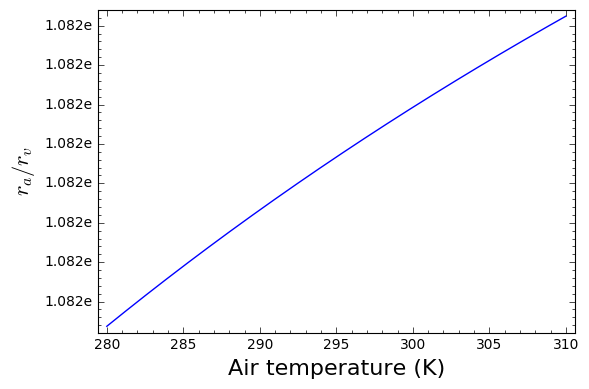

T_l = 308.321395271
E_l = 180.542235053942
H_l = 150.521099595469
R_ll = 68.9366653505872
g_bw = 0.0131620455576424
g_tw = 0.00291849206962754
Direct estimates: 
E_l = 198.222104889662
H_l = 201.777895110338
T_l == 310.133484539870
T_l == 310.133484539870
T_l == 309.093414355984
400 == 400.000000000000
Penman-stomata: 
E_l = 198.222104889662
H_l = 201.777895110338
T_l = 310.133484539870
400 == 400.000000000000
PM-equation: 
E_l = 241.448619283973
H_l = 158.551380716027
400 == 400.000000000000
MU-equation: 
E_l = 156.668183937778
H_l = 243.331816062222
400 == 400.000000000000
Corrected MU-equation: 
E_l = 195.741933442269
H_l = 204.258066557731
400 == 400.000000000000
4*T_l^3*a_sh*epsilon_l*sigm
[
Rll1 == -3*T1^4*a_sh*epsilon_l*sigm - T_w^4*a_sh*epsilon_l*sigm
]


R_ll == -(3*T_a^4 - 4*T_a^3*T_l + T_w^4)*a_sh*epsilon_l*sigm

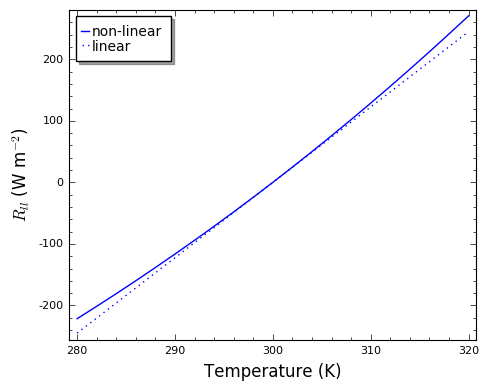

E_l == -(P_wa - P_wl)*c_E

H_l == -(T_a - T_l)*c_H

R_ll == -(3*T_a^4 - 4*T_a^3*T_l + T_w^4)*a_sh*epsilon_l*sigm

gamma_v == c_H/c_E

Delta_eTa == (P_was - P_wl)/(T_a - T_l)

E_l == -(P_wa*c_H - P_wl*c_H)/gamma_v

kilogram/second^3 == kilogram/second^3


E_l == -(Delta_eTa*T_a - Delta_eTa*T_l + P_wa - P_was)*c_H/gamma_v

kilogram/second^3 == kilogram/second^3


E_l == -((Delta_eTa*T_a^4 - Delta_eTa*T_w^4 + 4*(P_wa - P_was)*T_a^3)*a_sh*c_E*epsilon_l*sigm - Delta_eTa*R_s*c_E + (P_wa - P_was)*c_E*c_H)/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3


H_l == -((T_a^4 - T_w^4)*a_sh*c_H*epsilon_l*sigm - ((P_wa - P_was)*c_E + R_s)*c_H)/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3


T_l == ((3*T_a^4 + T_w^4)*a_sh*epsilon_l*sigm + (Delta_eTa*T_a + P_wa - P_was)*c_E + T_a*c_H + R_s)/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

kelvin == kelvin


T_l == ((3*T_a^4 + T_w^4)*a_sh*epsilon_l*sigm + (Delta_eTa*T_a + P_wa - P_was)*c_E + T_a*c_H + R_s)/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

E_l == -((Delta_eTa*T_a^4 - Delta_eTa*T_w^4 + 4*(P_wa - P_was)*T_a^3)*a_sh*c_E*epsilon_l*sigm - Delta_eTa*R_s*c_E + (P_wa - P_was)*c_E*c_H)/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

E_l == -((M_w*P_wa*T_w^4 + (3*M_w*P_wa - 4*M_w*P_wl)*T_a^4)*a_sh*epsilon_l*g_tw*lambda_E*sigm + (M_w*P_wa*R_s + (M_w*P_wa - M_w*P_wl)*T_a*c_H + (M_w*P_wa^2 - M_w*P_wa*P_was + (Delta_eTa*M_w*P_wa - Delta_eTa*M_w*P_wl)*T_a)*c_E)*g_tw*lambda_E)/(R_mol*T_a^2*c_H + (3*R_mol*T_a^5 + R_mol*T_a*T_w^4)*a_sh*epsilon_l*sigm + R_mol*R_s*T_a + (Delta_eTa*R_mol*T_a^2 + (P_wa - P_was)*R_mol*T_a)*c_E)

H_l == -((T_a^4 - T_w^4)*a_sh*c_H*epsilon_l*sigm - ((P_wa - P_was)*c_E + R_s)*c_H)/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

R_ll == (4*R_s*T_a^3*a_sh + (Delta_eTa*T_a^4 - Delta_eTa*T_w^4 + 4*(P_wa - P_was)*T_a^3)*a_sh*c_E + (T_a^4 - T_w^4)*a_sh*c_H)*epsilon_l*sigm/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

T_l = 308.321395271
E_l = 180.542235053942
H_l = 150.521099595469
R_ll = 68.9366653505872
g_bw = 0.0131620455576424
g_tw = 0.00291849206962754
Direct estimates: 
E_l = 177.353891811830
H_l = 153.963492920038
T_l = 308.443094724766
R_ll = 68.6826152681320
308.443094724766 == 308.443094724766
308.443094724766 == 308.443094724766
308.443094724766 == 307.807922524752
400 == 400.000000000000
Using T_l from eq_Tl_Delta_Rlllin.rhs() only to calculate R_ll: 
T_l = 308.443094724766
R_ll = 70.5556017512511
E_l = 176.784812127415
H_l = 152.659586121334
400 == 400.000000000000
Penman-stomata: 
E_l = 198.222104889662
H_l = 201.777895110338
T_l = 310.133484539870
400 == 400.000000000000
PM-equation: 
E_l = 241.448619283973
H_l = 158.551380716027
400 == 400.000000000000
MU-equation: 
E_l = 156.668183937778
H_l = 243.331816062222
400 == 400.000000000000
Corrected MU-equation: 
E_l = 195.741933442269
H_l = 204.258066557731
400 == 400.000000000000
imported file temp/E_PM_eqs
jupyter nbconvert  --to=pyth

nbconvert returned 0


Checking if specified ipynb file was run with sage kernel...
Renaming .py file to .sage if notebook kernel was sage (to avoid exponent error)
created file temp/stomatal_cond_eqs


k_dv == D_va/V_m

mole/(meter*second) == mole/(meter*second)


g_sp == A_p*k_dv*n_p/d_p

mole/(meter^2*second) == mole/(meter^2*second)


A_p == pi*r_p^2

meter^2 == meter^2


r_sp == d_p/(A_p*k_dv*n_p)

meter^2*second/mole == meter^2*second/mole


r_sp == d_p/(pi*k_dv*n_p*r_p^2)

meter^2*second/mole == meter^2*second/mole


r_vs == 1/4*(1/r_p - 4/(pi*s_p))/(k_dv*n_p)

r_vs == 1/4*(1/r_p - 4/(pi*s_p))/(k_dv*n_p)

s_p == 1/sqrt(n_p)

r_end == 1/4/(k_dv*n_p*r_p)

r_end == log(2*l_p/r_p)/(pi*k_dv*l_p*n_p)

g_swmol == (1/(r_end + r_sp + r_vs))

n_p == s_p^(-2)

r_bwmol == B_l/k_dv

2*pi*B_l*r_p^2/(2*pi*B_l*r_p^2 + (pi*r_p + 2*d_p)*s_p^2)

2/(s_p^2*(1/r_p + 2*d_p/(pi*r_p^2))/B_l + 2)

A_p == pi*r_p^2

r_p == sqrt(A_p/pi)

g_sw == -(P_wa - P_wl)*R_mol*T_a*T_l*g_swmol/(P_a*P_wl*T_a - P_a*P_wa*T_l)

g_sw == R_mol*T_a*g_swmol/P_a

imported file temp/stomatal_cond_eqs
jupyter nbconvert  --to=python 'leaf_enbalance2s_eqs.ipynb'
Exporting specified worksheet to .py file...


nbconvert returned 0


Checking if specified ipynb file was run with sage kernel...
Renaming .py file to .sage if notebook kernel was sage (to avoid exponent error)
created file temp/leaf_enbalance2s_eqs


Q_l == -(T_ll - T_lu)*k_l/z_l

kilogram/second^3 == kilogram/second^3


T_lu == (T_ll*k_l + Q_l*z_l)/k_l

kelvin == kelvin


H_lu == -(T_a - T_lu)*h_cu

kilogram/second^3 == kilogram/second^3


H_ll == -(T_a - T_ll)*h_cl

kilogram/second^3 == kilogram/second^3


h_cu == Nu*k_a/L_l

kilogram/(kelvin*second^3) == kilogram/(kelvin*second^3)


h_cu == Nu*k_a/L_l

kilogram/(kelvin*second^3) == kilogram/(kelvin*second^3)


R_llu == (T_lu^4 - T_w^4)*epsilon_l*sigm

kilogram/second^3 == kilogram/second^3


R_lll == (T_ll^4 - T_w^4)*epsilon_l*sigm

kilogram/second^3 == kilogram/second^3
Fraction of one-sided leaf area covered by stomata (1 if stomata are on one side only, 2 if they are on both sides)
Average 1-sided convective transfer coefficient


E_lu == -(C_wa*M_w*R_mol*T_lu*g_swu*h_cu*lambda_E*e^(M_w*lambda_E/(R_mol*T_lu)) - 611*M_w*g_swu*h_cu*lambda_E*e^(1/273*M_w*lambda_E/R_mol))/(Le^(2/3)*R_mol*T_lu*c_pa*g_swu*rho_a*e^(M_w*lambda_E/(R_mol*T_lu)) + R_mol*T_lu*h_cu*e^(M_w*lambda_E/(R_mol*T_lu)))

E_ll == -(C_wa*M_w*R_mol*T_ll*g_swl*h_cl*lambda_E*e^(M_w*lambda_E/(R_mol*T_ll)) - 611*M_w*g_swl*h_cl*lambda_E*e^(1/273*M_w*lambda_E/R_mol))/(Le^(2/3)*R_mol*T_ll*c_pa*g_swl*rho_a*e^(M_w*lambda_E/(R_mol*T_ll)) + R_mol*T_ll*h_cl*e^(M_w*lambda_E/(R_mol*T_ll)))

E_ll == -(C_wa*M_w*R_mol*T_ll*g_swl*h_cl*lambda_E*e^(M_w*lambda_E/(R_mol*T_ll)) - 611*M_w*g_swl*h_cl*lambda_E*e^(1/273*M_w*lambda_E/R_mol))/(Le^(2/3)*R_mol*T_ll*c_pa*g_swl*rho_a*e^(M_w*lambda_E/(R_mol*T_ll)) + R_mol*T_ll*h_cl*e^(M_w*lambda_E/(R_mol*T_ll)))

T_lu - T_ll: 0.778885052219
E_ll: 353.485416225740
isothermal: 
T_lu - T_ll: 1.59991486726e-09
E_ll: 359.928949158802
imported file temp/leaf_enbalance2s_eqs
jupyter nbconvert  --to=python 'leaf_chamber_eqs.ipynb'
Exporting specified worksheet to .py file...


nbconvert returned 0


Checking if specified ipynb file was run with sage kernel...
Renaming .py file to .sage if notebook kernel was sage (to avoid exponent error)
created file temp/leaf_chamber_eqs
C_wa            0.647207041733317
C_wl            1.12479267904924
D_va            0.0000248765000000000
E_l             142.258640360008
E_lmol          0.00322581950929723
H_l             -112.722448184652
L_l             0.0300000000000000
Le              0.888469037042992
M_N2            0.0280000000000000
M_O2            0.0320000000000000
M_w             0.0180000000000000
Nu              26.1863624980041
P_a             101325         
P_wa            1606.28367076831
P_wl            2768.40610422238
Pr              0.710000000000000
R_ll            -29.5361921753575
R_mol           8.31447200000000
R_s             0.000000000000000
Re              1927.40122068744
Re_c            3000           
T_a             298.500000000000
T_l             296.021082253  
T_w             298.500000000000
a_s         

Q_i == A_i*dT_i*lambda_i/L_i

L_i == A_i*dT_i*lambda_i/Q_i

L_i*c_pi*dT_i*rho_i

A_i*L_i*dT_i*lambda_i

[
[R_d == S_s, R_lu == -S_a + S_s, R_ld == S_b, R_u == 0]
]
B_l == 0.0106559443973775
B_l == 0.00119137080184970


V_c == H_c*L_c*W_c

meter^3 == meter^3


F_in_mola == F_in_v*(P_a - P_w_in)/(R_mol*T_in)

mole/second == mole/second


F_in_molw == F_in_v*P_w_in/(R_mol*T_in)

mole/second == mole/second


F_out_mola == F_out_v*(P_a - P_w_out)/(R_mol*T_out)

mole/second == mole/second


F_out_molw == F_out_v*P_w_out/(R_mol*T_out)

mole/second == mole/second


F_out_v == (F_out_mola + F_out_molw)*R_mol*T_out/P_a

meter^3/second == meter^3/second


F_out_v == (E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out)/(P_a*T_in)

F_out_molw == E_lmol*L_A + F_in_molw

F_out_v == (F_out_mola + F_out_molw)*R_mol*T_out/P_a

0 == H_l*L_A + (F_in_mola*M_air*c_pa + F_in_molw*M_w*c_pv)*T_in - (F_out_mola*M_air*c_pa + F_out_molw*M_w*c_pv)*T_out + Q_in

H_l == E_lmol*M_w*T_out*c_pv - F_in_mola*M_air*T_in*c_pa/L_A + F_in_mola*M_air*T_out*c_pa/L_A - F_in_molw*M_w*T_in*c_pv/L_A + F_in_molw*M_w*T_out*c_pv/L_A - Q_in/L_A

kilogram/second^3 == kilogram/second^3
[
T_out == (F_in_mola*M_air*T_in*c_pa + F_in_molw*M_w*T_in*c_pv + H_l*L_A + Q_in)/(E_lmol*L_A*M_w*c_pv + F_in_mola*M_air*c_pa + F_in_molw*M_w*c_pv)
]


T_out == (F_in_mola*M_air*T_in*c_pa + F_in_molw*M_w*T_in*c_pv + H_l*L_A + Q_in)/(E_lmol*L_A*M_w*c_pv + F_in_mola*M_air*c_pa + F_in_molw*M_w*c_pv)

T_out == (F_in_v*M_w*P_w_in*T_in*c_pv + H_l*L_A*R_mol*T_in + Q_in*R_mol*T_in + (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_in*c_pa)/(E_lmol*L_A*M_w*R_mol*T_in*c_pv + F_in_v*M_w*P_w_in*c_pv + (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*c_pa)


T_out == (F_in_v*M_w*P_w_in*T_in*c_pv + H_l*L_A*R_mol*T_in + Q_in*R_mol*T_in + (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_in*c_pa)/(E_lmol*L_A*M_w*R_mol*T_in*c_pv + F_in_v*M_w*P_w_in*c_pv + (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*c_pa)

T_out == (F_in_v*M_w*P_w_in*T_in*c_pv + H_l*L_A*R_mol*T_in + Q_in*R_mol*T_in + (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_in*c_pa)/(E_lmol*L_A*M_w*R_mol*T_in*c_pv + F_in_v*M_w*P_w_in*c_pv + (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*c_pa)

F_out_mola + F_out_molw == F_out_v*P_a/(R_mol*T_out)

E_lmol*L_A + F_in_v*(P_a - P_w_in)/(R_mol*T_in) + F_in_v*P_w_in/(R_mol*T_in) == F_out_v*P_a/(R_mol*T_out)

[
F_out_v == (E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out)/(P_a*T_in)
]


F_out_v == (E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out)/(P_a*T_in)

F_out_v == (E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out)/(P_a*T_in)

0 == H_l*L_A + (F_in_mola*M_air*c_pa + F_in_molw*M_w*c_pv)*T_in - (F_out_mola*M_air*c_pa + F_out_molw*M_w*c_pv)*T_out + Q_in

[
T_in == (F_in_v*M_w*P_w_in*T_out*c_pv + (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_out*c_pa)/(F_in_v*M_w*P_w_in*c_pv - (E_lmol*M_w*R_mol*T_out*c_pv - H_l*R_mol)*L_A + Q_in*R_mol + (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*c_pa)
]


T_in == (F_in_v*M_w*P_w_in*T_out*c_pv + (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_out*c_pa)/(F_in_v*M_w*P_w_in*c_pv - (E_lmol*M_w*R_mol*T_out*c_pv - H_l*R_mol)*L_A + Q_in*R_mol + (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*c_pa)

[
Q_in == ((E_lmol*M_w*R_mol*T_in*T_out*c_pv - H_l*R_mol*T_in)*L_A - ((F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_in - (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_out)*c_pa - (F_in_v*M_w*P_w_in*T_in - F_in_v*M_w*P_w_in*T_out)*c_pv)/(R_mol*T_in)
]
[
H_l == (E_lmol*L_A*M_w*R_mol*T_in*T_out*c_pv - Q_in*R_mol*T_in - ((F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_in - (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_out)*c_pa - (F_in_v*M_w*P_w_in*T_in - F_in_v*M_w*P_w_in*T_out)*c_pv)/(L_A*R_mol*T_in)
]


H_l == (E_lmol*L_A*M_w*R_mol*T_in*T_out*c_pv - Q_in*R_mol*T_in - ((F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_in - (F_in_v*M_air*P_a - F_in_v*M_air*P_w_in)*T_out)*c_pa - (F_in_v*M_w*P_w_in*T_in - F_in_v*M_w*P_w_in*T_out)*c_pv)/(L_A*R_mol*T_in)

[
H_l == -((F_in_mola*M_air*T_in - F_in_mola*M_air*T_out)*c_pa + (F_in_molw*M_w*T_in - F_out_molw*M_w*T_out)*c_pv + Q_in)/L_A
]


H_l == -((F_in_mola*M_air*T_in - F_in_mola*M_air*T_out)*c_pa + (F_in_molw*M_w*T_in - F_out_molw*M_w*T_out)*c_pv + Q_in)/L_A

[19.1756620432331, 35.0631107274011, 62.0367042507648, 106.473009443655, 177.667645607840, 288.831780737493, 458.305321164456, 710.999051614674, 1080.07052944457, 1608.82992645281, 2352.86266113812, 3382.34604242497, 4784.52773726516, 6666.32514525647, 9156.99713166349]


F_in_molw == F_in_v*P_w_in/(R_mol*T_in)

F_in_v == (F_in_mola + F_in_molw)*R_mol*T_in/P_a

F_in_mola == F_in_va_n*P_r/(R_mol*T_r)

mole/second == mole/second


F_in_molw == F_in_v*P_w_in/(R_mol*T_in)

mole/second == mole/second


F_in_v == F_in_mola*R_mol*T_in/(P_a - P_w_in)

meter^3/second == meter^3/second


F_in_molw == F_in_mola*P_w_in/(P_a - P_w_in)

mole/second == mole/second


F_in_v == F_in_va_n*P_r*T_in/((P_a - P_w_in)*T_r)

meter^3/second == meter^3/second
1227.86016957787
0.000166666666666667
Volumentric flow at 0 oC: 0.000168711114309656 m3/s
Volumentric flow at 25 oC: 0.000184152365848157 m3/s
25oC/0oC: 1.09152480322167
Volumentric flow at 25 oC without added vapour: 0.000181920800536946 m3/s


F_out_v == (E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out)/(P_a*T_in)

F_out_v == (F_out_mola + F_out_molw)*R_mol*T_out/P_a

F_in_mola == F_in_va_n*P_r/(R_mol*T_r)

F_in_v == F_in_va_n*P_r*T_in/((P_a - P_w_in)*T_r)

F_in_molw == F_in_v*P_w_in/(R_mol*T_in)

F_out_molw == F_out_v*P_w_out/(R_mol*T_out)

F_out_molw == E_lmol*L_A + F_in_molw

F_out_v*P_w_out/(R_mol*T_out) == E_lmol*L_A + F_in_v*P_w_in/(R_mol*T_in)

P_w_out == (E_lmol*L_A*P_a*R_mol*T_in + F_in_v*P_a*P_w_in)/(E_lmol*L_A*R_mol*T_in + F_in_v*P_a)

kilogram/(meter*second^2) == kilogram/(meter*second^2)


P_w_out == (E_lmol*L_A*P_a*R_mol*T_in + F_in_v*P_a*P_w_in)/(E_lmol*L_A*R_mol*T_in + F_in_v*P_a)

P_w_out == (E_lmol*L_A*P_a*R_mol*T_in + F_in_v*P_a*P_w_in)/(E_lmol*L_A*R_mol*T_in + F_in_v*P_a)

P_w_out == (E_lmol*L_A*P_a*R_mol*T_in + F_in_v*P_a*P_w_in)/(E_lmol*L_A*R_mol*T_in + (F_in_mola + F_in_molw)*R_mol*T_in)

P_w_out == (F_in_va_n*P_a*P_r*P_w_in + (E_lmol*P_a^2 - E_lmol*P_a*P_w_in)*L_A*R_mol*T_r)/((E_lmol*P_a - E_lmol*P_w_in)*L_A*R_mol*T_r + F_in_va_n*P_a*P_r)

P_w_out == (E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_w_in*T_out)/(F_out_v*T_in)

F_out_v == (E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out)/(P_a*T_in)

F_in_molw == F_in_v*P_w_in/(R_mol*T_in)

P_w_out == (E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_w_in*T_out)*P_a/(E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out)

P_w_out == E_lmol*L_A*P_a*R_mol*T_in*T_out/(E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out) + F_in_v*P_a*P_w_in*T_out/(E_lmol*L_A*R_mol*T_in*T_out + F_in_v*P_a*T_out)

E_lmol == E_l/(M_w*lambda_E)

mole/(meter^2*second) == mole/(meter^2*second)


P_w_in == -((E_lmol*P_a - E_lmol*P_w_out)*L_A*R_mol*T_in - F_in_v*P_a*P_w_out)/(F_in_v*P_a)

1227.86016957787
0.000166666666666667
Volumentric flow at 0 oC: 0.000168711114309656 m3/s
Volumentric flow at 25 oC: 0.000184152365848157 m3/s
25oC/0oC: 1.09152480322167
Volumentric flow at 25 oC without added vapour: 0.000181920800536946 m3/s


F_s == 1/2*L_ls*(sqrt((L_l/L_ls + L_s/L_ls)^2 + 4) - sqrt((L_l/L_ls - L_s/L_ls)^2 + 4))/L_s

0.821854415126695
imported file temp/leaf_chamber_eqs
jupyter nbconvert  --to=python 'perforated_foils_data.ipynb'
Exporting specified worksheet to .py file...


nbconvert returned 0


Checking if specified ipynb file was run with sage kernel...
Renaming .py file to .sage if notebook kernel was sage (to avoid exponent error)
created file temp/perforated_foils_data
M_N2            0.0280000000000000
M_O2            0.0320000000000000
M_w             0.0180000000000000
Pr              0.710000000000000
R_mol           8.31447200000000
a_sh            2              
c_pa            1010           
d_p             0.0000250000000000000
epsilon_l       1              
g               9.81000000000000
lambda_E        2.45000000000000e6
sigm            5.67000000000000e-8
CSV Version,1

"File name","63_7_1a.rpt"

"Title",""

"Measurement date","8/19/2013"

"Measurement time","4:18:28 PM"

"User mode","Easy"

"Objective lens","Standard lens 10.0","x"

"NA","0.300"

"Size","Standard"

"Mode","Surface profile"

area_av         1278.07271087  
area_perim      1.02329878749  
area_perim      8.10321519641  
area_std        362.405791974  
density_mm      29.8887533355  
diamete

nbconvert returned 0


Checking if specified ipynb file was run with sage kernel...
Renaming .py file to .sage if notebook kernel was sage (to avoid exponent error)
created file temp/leaf_chamber_data
E_l             180.542235053942
H_l             150.521099595469
T_l             308.321395271  
2 sides:
E_ll            178.457403037396
E_lu            -0.000000000000000
H_ll            73.27906127241589
H_lu            78.65857412879694
T_ll            308.181291542  
T_lu            308.561657011  


H_l == -(T_a - T_l)*c_pmol/r_bstar

kilogram/second^3 == kilogram/second^3


E_l == -L_E*(P_wa - P_wl)/(P_a*(r_b + r_s))

kilogram/second^3 == kilogram/second^3
h_c(Ball): 21.8153792127944
g_vmol(Ball): 0.110506932339455
g_vmol(SS): g_twmol == 0.117381005752392
T_l(Ball): 309.125596874492
T_l(SS): 308.321395271
T_a: 303


g_sw == g_bw*g_tw/(g_bw - g_tw)

g_tw == E_lmol*R_mol*T_a*T_l/(P_wl*T_a - P_wa*T_l)

h_c == -H_l/((T_a - T_l)*a_sh)

2016_03_17_wet_leaf_Licor/2016-03-17_stan_windtunnel
['OPEN 6.3.2']
['Thr Mar 17 2016 11:31:28']
['11:31:58 Artifcial leaf in wind tunnel, onl H2ORef important.']
['$STARTOFDATA$']
 
NEW data set
length previous = 0
['Obs', 'HHMMSS', 'FTime', 'EBal?', 'Photo', 'Cond', 'Ci', 'Trmmol', 'VpdL', 'CTleaf', 'Area', 'BLC_1', 'StmRat', 'BLCond', 'Tair', 'Tleaf', 'TBlk', 'CO2R', 'CO2S', 'H2OR', 'H2OS', 'RH_R', 'RH_S', 'Flow', 'PARi', 'PARo', 'Press', 'CsMch', 'HsMch', 'CsMchSD', 'HsMchSD', 'CrMchSD', 'HrMchSD', 'StableF', 'BLCslope', 'BLCoffst', 'f_parin', 'f_parout', 'alphaK', 'Status']
['11:32:26 Flow: Off']
['11:32:45 Launched AutoProg /User/Configs/AutoProgs/AutoLog2']
['11:33:34 CO2 Mixer -> OFF']
['11:33:34 Coolers: Off']
['11:33:34 Flow: Off']
['11:33:52 chamber air']
['11:42:42 changing to humidifier']
['11:45:40 increasinf tdew']
['11:47:12 back to chamber air']
['13:35:38 changing to humidifier']
['13:37:35 changing dew point']
['13:39:49 changing back to chamber air']
['15:27:42 chan

lc_time,T_in1,T_in2,T_wall_in,T_wall_out,T_outside,T_outside_PT,T_chamber,T_chamber1,T_leafTC_inlet,T_leafTC,Wind,T_dew,Air_inflow,Air_outflow,nr_time,Rn_above_leaf,Rn_below_leaf,Rn_beside_leaf,RnV_above_leaf,RnV_below_leaf,RnV_beside_leaf,SensirionSLI,Tleaf_IR,pow_timefirst,pow_timelast,fan_power_avg,fan_power_std,fan_power_n,Comment...................................................
TS,Deg C,Deg C,Deg C,Deg C,Deg C,Deg C,Deg C,Deg C,Deg C,Deg C,m/s,degC,SLPM,SLPM,TS,W/m^2,W/m^2,W/m^2,mV,mV,mV,ul/min,,TS,TS,W,W,,
2016-03-17 11:36:59,21.80,21.82,22.24,21.64,22.01,23.16,22.24,21.87,16.43,15.77,3.872,-19.56,2.556,0.5885,2016-03-17 11:37:01,14.22,-14.80,3.982,-0.01704,0.01538,-0.005136,-14.98,18.33,2016-03-17 11:36:05,2016-03-17 11:37:04,0.6391,0.00006741,53,"wet leaf, no radiation, -20 Tdew"
2016-03-17 13:31:29,21.73,21.75,22.08,22.45,22.54,23.71,22.08,21.74,16.15,15.45,3.897,-10.22,3.434,0.7098,2016-03-17 13:31:34,14.95,-15.35,4.534,-0.01791,0.01596,-0.005851,-15.73,18.30,2016-03-17 13:30:49,2016-03-17 13:31:47,0.6391,0.00004365,33,"wet leaf, no radiation, -10 Tdew"
2016-03-17 15:26:21,21.60,21.61,22.16,21.75,22.19,23.48,22.15,21.83,16.49,15.84,3.891,0.03776,5.551,0.9694,2016-03-17 15:26:26,13.05,-14.01,3.911,-0.01564,0.01456,-0.005045,-15.06,18.36,2016-03-17 15:25:27,2016-03-17 15:26:26,0.6391,0.00005362,54,"wet leaf, no radiation, 0 Tdew"
2016-03-17 16:58:43,20.53,20.55,21.95,21.34,21.84,23.18,21.96,21.69,17.75,17.28,3.939,10.14,8.921,1.463,2016-03-17 16:58:48,10.41,-10.90,3.336,-0.01248,0.01133,-0.004300,-10.97,19.09,2016-03-17 16:57:48,2016-03-17 16:58:47,0.6391,0.00003802,53,"wet leaf, no radiation, 10 Tdew"


[57, 68]
[704, 715]
[1363, 1374]
[1889, 1895]


T_d == 273*M_w*lambda_E/(M_w*lambda_E + 273*R_mol*log(611/P_wa))

[  861.98066   862.06968   861.98066 ...,  1663.61139  1663.41825
  1663.51482]
[  115.061879   243.9762     545.053539  1161.59244 ]
R_s = (0.0, 0.0) joule/(R_s*meter^2*second)
P_wa = (815.894013717, 1312.97802962) pascal/P_wa
T_a = (295.11, 295.39) kelvin/T_a
v_w = (3.872, 3.939) meter/(second*v_w)
g_sw = (999.0, 999.0) meter/(g_sw*second)


/home/sschyman/Programs/sage-upgrade/local/lib/python2.7/site-packages/dateutil/rrule.py:450: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)


lc_time,T_in1,T_in2,T_wall_in,T_wall_out,T_outside,T_outside_PT,T_chamber,T_leaf1,T_leaf2,T_leaf_in,Wind,T_dew,Air_inflow,Air_outflow,nr_time,T_leaf_IR,V_leaf_IR,sens_timefirst,sens_timelast,water_flow_avg,water_flow_std,water_flow_n,pow_timefirst,pow_timelast,fan_power_avg,fan_power_std,fan_power_n,Comment...................................................
TS,K,K,K,K,K,Deg C,K,K,K,K,m/s,degC,SLPM,SLPM,TS,Deg C,mV,,,ul/min,ul/min,ul/min,TS,TS,W,W,,
2014-03-05 15:15:18,16.23,16.35,22.73,22.76,22.75,23.58,22.70,20.83,21.22,NaN,4.943,-17.90,5.051,2.278,2014-03-05 15:15:19,15.54,-0.2384,2014-03-05 15:15:07,2014-03-05 15:15:17,-17.19,0.2266,95,2014-03-05 15:14:22,2014-03-05 15:15:21,1.407,2.220e-16,54,"lower Tdew, upwind CTA"
2014-03-05 15:32:02,16.25,16.36,22.81,22.85,22.83,23.70,22.77,20.99,21.34,NaN,5.275,-10.07,5.046,2.248,2014-03-05 15:32:01,15.86,-0.2277,2014-03-05 15:31:53,2014-03-05 15:32:03,-16.54,0.3207,100,2014-03-05 15:31:04,2014-03-05 15:32:03,1.407,2.220e-16,54,"higher Tdew, upwind CTA"
2014-03-05 16:08:45,16.24,16.36,22.86,23.19,23.19,24.07,22.82,20.98,21.41,17.25,5.329,-5.019,5.357,2.387,2014-03-05 16:08:45,15.84,-0.2283,2014-03-05 16:08:36,2014-03-05 16:08:45,-15.94,0.1731,100,2014-03-05 16:07:47,2014-03-05 16:08:46,1.407,0.0000,55,"sun has come out, outside wall suddenly started warming, rest unaffected"
2014-03-05 16:54:32,16.23,16.35,23.08,23.06,23.01,23.70,23.05,21.45,21.74,17.78,5.252,0.08289,5.193,2.409,2014-03-05 16:54:33,16.50,-0.2055,2014-03-05 16:54:25,2014-03-05 16:54:35,-15.02,0.2545,100,2014-03-05 16:53:36,2014-03-05 16:54:35,1.406,0.0000,54,
2014-03-06 10:35:50,15.87,15.97,21.86,21.81,21.79,22.57,21.83,20.06,20.50,16.32,5.356,0.09190,5.265,2.401,2014-03-06 10:35:53,16.65,-0.2004,2014-03-06 10:35:43,2014-03-06 10:35:53,-16.51,0.1232,100,2014-03-06 10:34:54,2014-03-06 10:35:53,1.412,0.0003413,52,
2014-03-06 11:11:22,15.60,15.69,21.72,21.77,21.72,22.53,21.68,20.13,20.50,16.78,5.455,5.125,5.957,2.635,2014-03-06 11:11:24,17.11,-0.1843,2014-03-06 11:11:06,2014-03-06 11:11:16,-14.94,0.1902,100,2014-03-06 11:10:25,2014-03-06 11:11:24,1.412,0.0000,54,
2014-03-06 12:54:16,15.45,15.54,21.74,21.77,21.73,22.41,21.69,20.35,20.74,17.71,5.360,10.21,6.529,2.843,2014-03-06 12:54:17,17.96,-0.1545,2014-03-06 12:54:10,2014-03-06 12:54:18,-12.30,0.1152,80,2014-03-06 12:53:18,2014-03-06 12:54:17,1.412,0.0000,55,
2014-03-06 13:58:02,15.89,15.99,21.95,21.93,21.92,22.69,21.92,20.20,20.57,16.46,5.451,-5.014,5.410,2.442,2014-03-06 13:58:01,16.46,-0.2069,2014-03-06 13:57:52,2014-03-06 13:58:02,-15.03,0.1793,100,2014-03-06 13:57:04,2014-03-06 13:58:03,1.412,0.0000,54,
2014-03-06 14:55:11,15.26,15.32,22.22,22.21,22.19,22.93,22.24,20.24,21.08,18.01,0.8222,10.21,7.830,3.616,2014-03-06 14:55:10,17.47,-0.1719,2014-03-06 14:55:02,2014-03-06 14:55:12,-6.361,0.1421,100,2014-03-06 14:54:13,2014-03-06 14:55:12,1.412,0.0000,54,low wind speed


R_s = (0.0, 0.0) joule/(R_s*meter^2*second)
P_wa = (1200.40416881, 1342.46062459) pascal/P_wa
T_a = (295.35, 295.61) kelvin/T_a
v_w = (0.8222, 5.468) meter/(second*v_w)
g_sw = (999.0, 999.0) meter/(g_sw*second)
R_s = (0.0, 0.0) joule/(R_s*meter^2*second)
P_wa = (1200.40416881, 1342.46062459) pascal/P_wa
T_a = (295.35, 295.61) kelvin/T_a
v_w = (0.8222, 5.468) meter/(second*v_w)
g_sw = (999.0, 999.0) meter/(g_sw*second)


lc_time,T_in1,T_in2,T_wall_in,T_wall_out,T_outside,T_outside_PT,T_chamber,T_leaf1,T_leaf2,T_leaf_in,Wind,T_dew,Air_inflow,Air_outflow,nr_time,T_leaf_IR,V_leaf_IR,Rn_above_leaf,Rn_below_leaf,Rn_beside_leaf,RnV_above_leaf,RnV_below_leaf,RnV_beside_leaf,sens_timefirst,sens_timelast,water_flow_avg,water_flow_std,water_flow_n,pow_timefirst,pow_timelast,fan_power_avg,fan_power_std,fan_power_n,Comment...................................................
TS,K,K,K,K,K,Deg C,K,K,K,K,m/s,degC,SLPM,SLPM,TS,Deg C,mV,W/m^2,W/m^2,W/m^2,mV,mV,mV,,,ul/min,ul/min,ul/min,TS,TS,W,W,,
2014-03-19 16:12:55,26.47,26.31,22.72,22.66,22.50,23.14,22.73,20.22,21.84,16.09,1.000,-10.07,3.939,2.150,2014-03-19 16:12:57,15.60,-0.2363,18.54,-19.70,-7.710,-0.02218,0.02048,0.009957,2014-03-19 16:12:20,2014-03-19 16:12:27,-9.747,0.1542,100,2014-03-19 16:11:56,2014-03-19 16:12:55,0.06452,0.00003198,54,"Black leaf only with filter paper, varying Tdew, cooler set to 20oC, humidifier T increased if necessary for steady state"
2014-03-19 17:25:05,26.42,26.27,22.64,22.68,22.53,23.38,22.62,20.05,21.76,15.74,1.040,-14.81,4.050,2.244,2014-03-19 17:25:06,15.31,-0.2463,19.15,-20.43,-8.228,-0.02292,0.02124,0.01063,2014-03-19 17:24:52,2014-03-19 17:24:59,-10.07,0.1254,100,2014-03-19 17:24:07,2014-03-19 17:25:06,0.06433,0.00001351,54,varying Tdew
2014-03-20 15:48:40,25.20,25.18,23.32,23.35,23.13,26.59,23.34,21.35,21.46,16.73,1.016,0.09124,7.228,3.876,2014-03-20 15:48:40,15.60,-0.2362,19.43,-18.45,26.66,-0.02325,0.01919,-0.03457,2014-03-20 15:48:19,2014-03-20 15:48:26,-9.434,0.09447,100,2014-03-20 15:47:40,2014-03-20 15:48:39,0.06381,0.00001725,55,varying Tdew
2014-03-20 17:07:40,25.19,25.18,23.40,23.43,23.34,26.75,23.42,21.19,21.30,16.15,1.034,-5.024,8.836,4.576,2014-03-20 17:07:40,14.96,-0.2582,21.20,-20.15,26.72,-0.02537,0.02095,-0.03465,2014-03-20 17:07:26,2014-03-20 17:07:33,-10.28,0.2422,100,2014-03-20 17:06:42,2014-03-20 17:07:40,0.06378,0.00002570,54,varying Tdew
2014-03-24 12:32:10,26.41,26.29,22.33,22.38,22.29,25.77,22.35,19.04,21.25,16.24,1.018,-5.015,3.558,2.085,2014-03-24 12:32:12,16.24,-0.2142,17.04,-16.80,-0.4545,-0.02039,0.01747,0.0005564,2014-03-24 12:32:03,2014-03-24 12:32:10,-8.945,0.1869,100,2014-03-24 12:31:10,2014-03-24 12:32:09,0.06426,0.00001137,55,varying Tdew
2014-03-24 14:11:58,24.02,24.01,22.56,22.53,22.45,25.85,22.58,19.56,21.55,17.00,1.009,5.115,8.549,4.539,2014-03-24 14:11:59,16.82,-0.1943,15.65,-15.06,-0.7787,-0.01872,0.01566,0.0009764,2014-03-24 14:11:50,2014-03-24 14:11:57,-8.092,0.1858,100,2014-03-24 14:10:58,2014-03-24 14:11:57,0.06428,0.00001451,55,varying Tdew
2014-03-24 14:43:04,24.25,24.23,22.57,22.58,22.47,25.93,22.59,20.20,21.78,18.19,1.012,10.21,5.554,3.175,2014-03-24 14:43:06,17.91,-0.1562,12.55,-11.98,-0.1198,-0.01502,0.01246,0.0001227,2014-03-24 14:42:49,2014-03-24 14:42:56,-6.581,0.1051,100,2014-03-24 14:42:05,2014-03-24 14:43:04,0.06431,0.00001674,54,varying Tdew
2014-03-24 16:24:34,23.23,23.19,22.21,22.30,22.24,25.57,22.22,20.66,21.69,19.41,1.038,15.14,4.038,2.444,2014-03-24 16:24:33,19.09,-0.1145,7.638,-8.015,4.552,-0.009139,0.008339,-0.005931,2014-03-24 16:24:26,2014-03-24 16:24:33,-4.273,0.1099,100,2014-03-24 16:23:34,2014-03-24 16:24:33,0.06441,0.00001503,54,varying Tdew
2014-03-24 18:05:16,22.65,22.65,22.50,22.38,22.38,25.89,22.50,21.80,22.26,21.30,1.032,20.10,4.065,2.476,2014-03-24 18:05:19,20.79,-0.05258,3.647,-3.204,1.439,-0.004363,0.003339,-0.001896,2014-03-24 18:04:58,2014-03-24 18:05:05,-1.934,0.1372,100,2014-03-24 18:04:18,2014-03-24 18:05:17,0.06427,0.00001650,54,varying Tdew


R_s = (0.0, 0.0) joule/(R_s*meter^2*second)
P_wa = (466.848762265, 2221.34112236) pascal/P_wa
T_a = (295.37, 296.57) kelvin/T_a
v_w = (1.0, 1.04) meter/(second*v_w)
g_sw = (999.0, 999.0) meter/(g_sw*second)


lc_time,T_in1,T_in2,T_wall_in,T_wall_out,T_outside,T_outside_PT,T_chamber,T_leaf1,T_leaf2,T_leaf_in,Wind,T_dew,Air_inflow,Air_outflow,nr_time,T_leaf_IR,V_leaf_IR,sens_timefirst,sens_timelast,water_flow_avg,water_flow_std,water_flow_n,pow_timefirst,pow_timelast,fan_power_avg,fan_power_std,fan_power_n,Comment...................................................
TS,K,K,K,K,K,Deg C,K,K,K,K,m/s,degC,SLPM,SLPM,TS,Deg C,mV,,,ul/min,ul/min,ul/min,TS,TS,W,W,,
2014-03-08 13:57:52,15.27,15.34,22.01,22.01,21.99,22.73,21.95,21.49,21.64,19.42,5.559,10.21,7.192,3.081,2014-03-08 13:57:50,20.46,-0.06480,2014-03-08 13:57:45,2014-03-08 13:57:52,-8.900,0.09177,100,2014-03-08 13:56:53,2014-03-08 13:57:52,1.412,0.0000,54,varying wind speed
2014-03-08 14:22:57,15.27,15.33,21.98,22.05,22.02,22.85,21.96,21.44,21.58,19.34,4.740,10.21,7.292,3.095,2014-03-08 14:22:58,20.41,-0.06680,2014-03-08 14:22:52,2014-03-08 14:22:59,-8.492,0.1071,100,2014-03-08 14:22:01,2014-03-08 14:22:59,1.411,0.0000,54,varying wind speed
2014-03-08 15:01:24,15.38,15.44,22.05,22.08,22.06,22.81,22.09,21.47,21.64,19.37,3.887,10.21,7.042,3.018,2014-03-08 15:01:25,20.46,-0.06480,2014-03-08 15:01:19,2014-03-08 15:01:26,-8.020,0.08356,100,2014-03-08 15:00:28,2014-03-08 15:01:27,1.378,0.0004714,54,varying wind speed
2014-03-08 15:30:25,15.36,15.43,22.08,22.07,22.03,22.81,22.10,21.40,21.62,19.30,3.192,10.21,7.146,2.948,2014-03-08 15:30:23,20.41,-0.06679,2014-03-08 15:30:18,2014-03-08 15:30:25,-7.362,0.1076,100,2014-03-08 15:29:27,2014-03-08 15:30:25,1.366,0.0005000,54,varying wind speed
2014-03-08 16:24:17,15.27,15.36,22.05,22.08,22.02,22.93,22.07,21.26,21.53,19.16,2.480,10.21,7.420,3.026,2014-03-08 16:24:16,20.35,-0.06879,2014-03-08 16:24:10,2014-03-08 16:24:17,-6.647,0.1155,100,2014-03-08 16:23:18,2014-03-08 16:24:17,1.378,0.0000,55,varying wind speed
2014-03-08 16:40:37,15.25,15.33,22.09,22.08,22.03,22.89,22.10,21.09,21.42,18.99,1.744,10.21,7.585,3.110,2014-03-08 16:40:38,20.30,-0.07079,2014-03-08 16:24:19,2014-03-08 16:24:25,-5.803,0.1403,100,2014-03-08 16:39:40,2014-03-08 16:40:39,1.378,0.0000,55,varying wind speed
2014-03-08 17:13:26,15.13,15.20,22.09,22.12,22.06,22.85,22.09,20.75,21.13,18.74,0.8469,10.20,7.960,3.221,2014-03-08 17:13:29,20.13,-0.07677,2014-03-08 17:13:21,2014-03-08 17:13:28,-4.810,0.07704,100,2014-03-08 17:12:30,2014-03-08 17:13:29,1.378,0.0000,54,varying wind speed


R_s = (0.0, 0.0) joule/(R_s*meter^2*second)
P_wa = (1173.97846865, 1252.74896325) pascal/P_wa
T_a = (295.1, 295.25) kelvin/T_a
v_w = (0.8469, 5.559) meter/(second*v_w)
g_sw = (0.05, 0.05) meter/(g_sw*second)


lc_time,T_in1,T_in2,T_wall_in,T_wall_out,T_outside,T_outside_PT,T_chamber,T_chamber1,T_leaf1,T_leaf2,T_leaf_in,Wind,T_dew,Air_inflow,Air_outflow,nr_time,T_leaf_IR,V_leaf_IR,Rn_above_leaf,Rn_below_leaf,Rn_beside_leaf,RnV_above_leaf,RnV_below_leaf,RnV_beside_leaf,sens_timefirst,sens_timelast,water_flow_avg,water_flow_std,water_flow_n,pow_timefirst,pow_timelast,fan_power_avg,fan_power_std,fan_power_n,Comment...................................................
TS,K,K,K,K,K,Deg C,K,K,K,K,K,m/s,degC,SLPM,SLPM,TS,Deg C,mV,W/m^2,W/m^2,W/m^2,mV,mV,mV,,,ul/min,ul/min,ul/min,TS,TS,W,W,,
2014-03-25 12:39:34,23.98,23.97,22.56,22.52,22.50,25.93,22.58,21.99,19.92,21.18,16.53,0.9999,-19.32,9.052,4.451,2014-03-25 12:39:35,19.36,-0.1045,16.74,-6.927,-26.00,-0.02004,0.007208,0.03366,2014-03-25 12:39:21,2014-03-25 12:39:28,-8.233,0.1577,100,2014-03-25 12:38:37,2014-03-25 12:39:35,0.06427,0.00001266,54,"Black leaf, silver perforated alu (35.4-1), varying Tdew"
2014-03-25 13:01:40,23.97,23.97,22.57,22.58,22.54,26.05,22.58,22.00,20.00,21.22,16.68,1.020,-14.97,8.490,4.180,2014-03-25 13:01:41,19.36,-0.1045,16.25,-6.859,-25.52,-0.01945,0.007137,0.03303,2014-03-25 13:01:22,2014-03-25 13:01:29,-7.859,0.3323,100,2014-03-25 13:00:39,2014-03-25 13:01:38,0.06428,0.00002267,55,varying Tdew
2014-03-25 14:07:31,23.91,23.91,22.58,22.59,22.59,26.10,22.57,22.04,20.10,21.26,16.88,1.021,-10.08,8.556,4.293,2014-03-25 14:07:31,19.53,-0.09854,15.18,-6.506,-24.44,-0.01817,0.006771,0.03163,2014-03-25 14:07:11,2014-03-25 14:07:18,-7.807,0.1403,100,2014-03-25 14:06:32,2014-03-25 14:07:31,0.06429,0.00001291,54,varying Tdew
2014-03-25 16:30:31,24.25,24.24,22.76,22.68,22.67,26.14,22.77,22.26,20.43,21.52,17.38,1.028,-5.017,7.524,3.821,2014-03-25 16:30:34,19.81,-0.08857,14.46,-6.187,-22.65,-0.01730,0.006439,0.02931,2014-03-25 16:30:18,2014-03-25 16:30:25,-7.440,0.07817,100,2014-03-25 16:29:33,2014-03-25 16:30:32,0.06417,0.00001307,54,varying Tdew
2014-03-25 16:48:46,24.28,24.23,22.73,22.73,22.72,26.02,22.75,22.25,20.57,21.61,17.81,1.019,0.08945,6.557,3.387,2014-03-25 16:48:48,19.92,-0.08459,13.34,-5.753,-20.79,-0.01596,0.005988,0.02690,2014-03-25 16:48:26,2014-03-25 16:48:33,-6.759,0.2183,100,2014-03-25 16:47:46,2014-03-25 16:48:45,0.06423,0.00002734,55,varying Tdew
2014-03-25 17:08:19,24.24,24.21,22.75,22.67,22.68,26.02,22.74,22.34,20.86,21.74,18.41,1.026,5.120,5.555,2.939,2014-03-25 17:08:22,20.11,-0.07734,11.71,-5.082,-18.50,-0.01401,0.005290,0.02393,2014-03-25 17:08:08,2014-03-25 17:08:15,-5.926,0.1492,100,2014-03-25 17:07:21,2014-03-25 17:08:20,0.06411,0.00001511,55,varying Tdew
2014-03-25 17:33:07,24.16,24.14,22.79,22.74,22.69,26.06,22.80,22.46,21.25,21.97,19.27,1.016,10.21,4.554,2.509,2014-03-25 17:33:08,20.48,-0.06401,9.708,-4.205,-15.42,-0.01162,0.004379,0.01994,2014-03-25 17:32:52,2014-03-25 17:32:59,-5.070,0.1435,100,2014-03-25 17:32:06,2014-03-25 17:33:05,0.06434,0.00002586,55,varying Tdew
2014-03-25 18:20:04,23.97,23.93,22.78,22.77,22.75,26.06,22.79,22.53,21.71,22.21,20.36,1.040,15.16,3.047,1.719,2014-03-25 18:20:06,20.90,-0.04869,6.990,-2.973,-10.52,-0.008364,0.003099,0.01360,2014-03-25 18:19:53,2014-03-25 18:20:00,-3.535,0.2791,100,2014-03-25 18:19:05,2014-03-25 18:20:04,0.06408,0.00002733,55,varying Tdew


R_s = (0.0, 0.0) joule/(R_s*meter^2*second)
P_wa = (218.598991722, 1694.78883295) pascal/P_wa
T_a = (295.72, 295.95) kelvin/T_a
v_w = (0.9999, 1.04) meter/(second*v_w)
g_sw = (0.035, 0.035) meter/(g_sw*second)


lc_time,T_in1,T_in2,T_wall_in,T_wall_out,T_outside,T_outside_PT,T_chamber,T_chamber1,T_leaf1,T_leaf2,T_leaf_in,Wind,T_dew,Air_inflow,Air_outflow,nr_time,T_leaf_IR,V_leaf_IR,Rn_above_leaf,Rn_below_leaf,Rn_beside_leaf,RnV_above_leaf,RnV_below_leaf,RnV_beside_leaf,sens_timefirst,sens_timelast,water_flow_avg,water_flow_std,water_flow_n,pow_timefirst,pow_timelast,fan_power_avg,fan_power_std,fan_power_n,Comment...................................................
TS,K,K,K,K,K,Deg C,K,K,K,K,K,m/s,degC,SLPM,SLPM,TS,Deg C,mV,W/m^2,W/m^2,W/m^2,mV,mV,mV,,,ul/min,ul/min,ul/min,TS,TS,W,W,,
2014-03-27 11:22:28,15.30,15.41,21.98,21.97,21.88,25.24,22.00,21.67,20.29,21.07,18.41,0.8333,10.21,6.827,3.491,2014-03-27 11:22:29,20.30,-0.07058,9.835,-3.912,-13.66,-0.01177,0.004074,0.01766,2014-03-27 11:22:19,2014-03-27 11:22:26,-4.825,0.1412,100,2014-03-27 11:21:28,2014-03-27 11:22:27,1.195,0.0003885,54,"Black leaf, silver perforated alu (35.4-1), varying wind speed"
2014-03-27 13:01:58,15.54,15.65,22.22,22.26,22.22,25.53,22.22,21.95,20.72,21.46,18.72,1.313,10.21,6.427,3.324,2014-03-27 13:02:01,20.41,-0.06664,10.02,-3.833,-16.85,-0.01199,0.003993,0.02180,2014-03-27 13:01:48,2014-03-27 13:01:55,-5.543,0.1600,100,2014-03-27 13:00:59,2014-03-27 13:01:58,1.181,0.0004875,54,varying wind speed
2014-03-27 14:04:25,15.68,15.80,22.41,22.40,22.37,25.69,22.43,22.17,21.05,21.76,18.95,1.796,10.21,6.251,3.274,2014-03-27 14:04:23,20.36,-0.06849,10.02,-3.781,-17.83,-0.01198,0.003939,0.02307,2014-03-27 14:04:10,2014-03-27 14:04:17,-6.124,0.1336,100,2014-03-27 14:03:24,2014-03-27 14:04:23,1.185,0.0003885,54,varying wind speed
2014-03-27 15:55:10,15.74,15.85,22.40,22.42,22.36,25.61,22.42,22.18,21.22,21.85,19.06,2.299,10.21,6.140,3.202,2014-03-27 15:55:11,19.58,-0.09654,9.917,-3.843,-17.14,-0.01187,0.004003,0.02218,2014-03-27 15:55:01,2014-03-27 15:55:08,-6.583,0.1710,100,2014-03-27 15:54:09,2014-03-27 15:55:08,1.169,0.0004755,55,varying wind speed
2014-03-27 17:01:01,15.90,16.02,22.43,22.48,22.40,25.81,22.45,22.22,21.42,21.96,19.24,2.995,10.21,5.851,3.136,2014-03-27 17:01:03,20.03,-0.08036,8.408,-3.625,-16.34,-0.01006,0.003776,0.02114,2014-03-27 17:00:38,2014-03-27 17:00:48,-7.255,0.1174,100,2014-03-27 17:00:04,2014-03-27 17:01:03,1.144,0.0000,54,varying wind speed
2014-03-27 19:00:22,15.88,15.99,22.40,22.38,22.21,25.57,22.46,22.24,21.53,22.03,19.38,3.831,10.20,5.750,3.057,2014-03-27 19:00:26,19.20,-0.1106,8.123,-3.345,-14.00,-0.009719,0.003485,0.01811,2014-03-27 19:00:07,2014-03-27 19:00:17,-8.006,0.1148,100,2014-03-27 18:59:24,2014-03-27 19:00:23,1.155,0.0004130,55,varying wind speed
2014-03-28 10:08:04,15.46,15.57,21.81,21.91,21.85,25.20,21.85,21.67,20.98,21.44,18.93,3.804,10.20,6.147,3.245,2014-03-28 10:08:10,19.58,-0.09655,8.239,-2.960,-12.37,-0.009857,0.003085,0.01600,2014-03-28 10:07:52,2014-03-28 10:08:02,-7.736,0.1666,100,2014-03-28 10:07:07,2014-03-28 10:08:06,1.159,0.0001872,55,New day
2014-03-28 11:29:49,15.71,15.83,22.23,22.21,22.15,25.57,22.24,22.08,21.38,21.84,19.29,4.335,10.20,5.858,3.204,2014-03-28 11:29:51,19.47,-0.1005,8.058,-3.227,-12.36,-0.009641,0.003363,0.01599,2014-03-28 11:29:27,2014-03-28 11:29:37,-7.984,0.08737,100,2014-03-28 11:28:49,2014-03-28 11:29:48,1.174,0.0004692,55,New day
2014-03-28 13:47:28,15.80,15.90,22.35,22.28,22.21,25.57,22.31,22.16,21.54,21.99,19.46,5.102,10.20,5.858,3.131,2014-03-28 13:47:29,19.50,-0.09967,6.985,-3.328,-12.71,-0.008357,0.003468,0.01643,2014-03-28 13:47:18,2014-03-28 13:47:27,-8.505,0.1932,100,2014-03-28 13:46:29,2014-03-28 13:47:28,1.186,0.0004914,54,Reduced head difference (transpiration seemed low)


0.0420000000000000
R_s = (0.0, 0.0) joule/(R_s*meter^2*second)
P_wa = (1187.38813505, 1278.34796382) pascal/P_wa
T_a = (295.0, 296.53) kelvin/T_a
v_w = (0.8333, 5.102) meter/(second*v_w)
g_sw = (0.042, 0.042) meter/(g_sw*second)
18
['Date', 'Time', 'Inflow rate', 'Tdew humidifier', 'Incoming2 Temp_C(5)', 'Incoming3 Temp_C(6)', 'wall inside Temp_C(3) ', 'wall outside Temp_C(4)', 'chamber air Temp_C(1) ', 'Tl1', 'Tl2', 'TlIR', 'Tlin', 'Fan power', 'FlowMeter out', 'Wind speed', 'Sensirion', 'Comment']
['', '', 'l/min', 'oC', 'oC', 'oC', 'oC', 'oC', 'oC', 'oC', 'oC', 'oC', 'oC', 'W', 'l/min', 'm/s', 'ul/min', '']
R_s = (0.0, 0.0) joule/(R_s*meter^2*second)
P_wa = (168.502255462, 1143.55502295) pascal/P_wa
T_a = (296.05, 296.71) kelvin/T_a
v_w = (0.7, 0.7) meter/(second*v_w)
g_sw = (0.007, 0.007) meter/(g_sw*second)


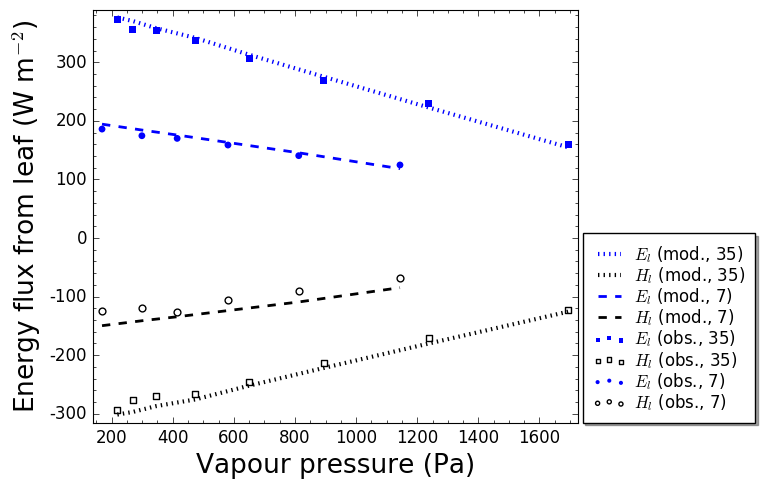

-R_ll + R_s == R_d - R_ld - R_lu + R_u

lc_time,T_in1,T_in2,T_wall_in,T_wall_out,T_outside,T_outside_PT,T_chamber,T_chamber1,T_leaf1,T_leaf2,T_leaf_in,Wind,T_dew,Air_inflow,Air_outflow,nr_time,T_leaf_IR,V_leaf_IR,Rn_above_leaf,Rn_below_leaf,Rn_beside_leaf,RnV_above_leaf,RnV_below_leaf,RnV_beside_leaf,sens_timefirst,sens_timelast,water_flow_avg,water_flow_std,water_flow_n,pow_timefirst,pow_timelast,fan_power_avg,fan_power_std,fan_power_n,Comment...................................................
TS,K,K,K,K,K,Deg C,K,K,K,K,K,m/s,degC,SLPM,SLPM,TS,Deg C,mV,W/m^2,W/m^2,W/m^2,mV,mV,mV,,,ul/min,ul/min,ul/min,TS,TS,W,W,,
2014-05-12 13:32:19,13.08,13.30,23.19,23.18,23.16,26.59,23.17,22.99,21.73,22.80,18.11,5.155,-10.15,4.846,2.292,2014-05-12 13:32:21,17.76,-0.1615,371.1,-19.10,225.6,-0.4441,0.01983,-0.2922,2014-05-12 13:32:09,2014-05-12 13:32:16,-20.85,0.2724,100,2014-05-12 13:31:17,2014-05-12 13:32:16,1.188,0.0000,54,"unlimited gsv, R_s=370, varying v_w"
2014-05-12 14:18:10,13.06,13.24,23.25,23.35,23.34,26.79,23.31,23.11,21.74,22.89,18.35,3.973,-10.09,4.962,2.336,2014-05-12 14:18:10,17.88,-0.1575,375.5,-19.13,231.6,-0.4493,0.01986,-0.3001,2014-05-12 14:17:59,2014-05-12 14:18:06,-19.82,0.4223,100,2014-05-12 14:17:06,2014-05-12 14:18:05,1.188,0.0000,54,"When moving top sensor, Rs is 390 above the edge of leaf, 340 just beside leaf, varying v_w"
2014-05-12 14:18:10,13.06,13.24,23.25,23.35,23.34,26.79,23.31,23.11,21.74,22.89,18.35,3.126,-10.09,4.962,2.336,2014-05-12 14:18:10,17.88,-0.1575,375.0,-19.67,243.0,-0.4488,0.02042,-0.3148,2014-05-12 14:17:59,2014-05-12 14:18:06,-19.82,0.4223,100,2014-05-12 14:17:06,2014-05-12 14:18:05,1.188,0.0000,54,varying v_w
2014-05-12 16:16:31,12.77,12.97,23.42,23.40,23.40,26.75,23.45,23.31,21.75,22.99,19.17,2.138,-10.11,5.447,2.379,2014-05-12 16:16:34,18.64,-0.1307,379.8,-19.36,254.9,-0.4545,0.02010,-0.3302,2014-05-12 16:16:24,2014-05-12 16:16:31,-16.59,0.6848,100,2014-05-12 16:15:32,2014-05-12 16:16:31,1.188,0.0001373,52,varying v_w
2014-05-13 14:14:07,12.43,12.60,22.94,23.10,23.11,26.54,22.97,22.92,20.50,22.85,18.84,2.091,-10.09,5.544,3.058,2014-05-13 14:14:09,18.68,-0.1292,374.8,-18.97,259.1,-0.4486,0.01970,-0.3357,2014-05-13 14:13:59,2014-05-13 14:14:06,-17.50,0.2599,100,2014-05-13 14:13:08,2014-05-13 14:14:06,1.195,0.0006326,53,"new day, Rs=394 at edge of leaf, 330 just beside, but above BL, outside T had just gone up but inside stable, varying v_w"
2014-05-13 14:44:07,12.28,12.44,23.20,23.10,23.08,26.30,23.21,23.28,21.28,23.22,20.56,0.7194,-10.08,5.847,3.133,2014-05-13 14:44:07,20.27,-0.07185,384.2,-17.78,284.7,-0.4598,0.01846,-0.3689,2014-05-13 14:43:56,2014-05-13 14:44:03,-13.52,0.2529,100,2014-05-13 14:43:05,2014-05-13 14:44:04,1.195,0.0004978,53,varying v_w
2014-05-13 15:39:22,12.51,12.68,23.26,23.14,23.12,26.46,23.28,23.26,20.89,23.17,19.62,1.249,-10.10,5.651,3.042,2014-05-13 15:39:25,19.34,-0.1057,380.0,-18.90,268.9,-0.4548,0.01962,-0.3483,2014-05-13 15:39:14,2014-05-13 15:39:21,-15.70,0.1998,100,2014-05-13 15:38:22,2014-05-13 15:39:21,1.194,0.0004736,53,"T_w_out went down when opening the door, stable and equal to T_w_in before, varying v_w"
2014-05-13 16:31:52,12.36,12.52,22.95,23.02,23.01,26.26,22.98,22.94,20.56,22.86,19.08,1.708,-10.08,5.740,3.068,2014-05-13 16:31:53,19.00,-0.1177,375.4,-19.11,264.1,-0.4493,0.01984,-0.3421,2014-05-13 16:31:44,2014-05-13 16:31:51,-16.62,0.2411,100,2014-05-13 16:30:52,2014-05-13 16:31:51,1.194,0.0004796,53,"not quite steady-state, as both T_win and T_wout still decreasing, varying v_w"
2014-05-14 11:25:40,12.44,12.61,22.58,22.74,22.74,26.06,22.61,22.52,20.17,22.43,18.32,2.837,-10.08,5.360,-2.438,2014-05-14 11:25:42,18.65,-0.1303,374.1,-19.12,258.2,-0.4477,0.01985,-0.3345,2014-05-14 11:25:31,2014-05-14 11:25:38,-18.64,0.3499,100,2014-05-14 11:24:38,2014-05-14 11:25:37,1.149,0.0000,54,"T_win constant while T_wout varies, varying v_w"


R_s = (371.1, 384.7) joule/(R_s*meter^2*second)
P_wa = (521.148378386, 802.717535554) pascal/P_wa
T_a = (295.76, 296.6) kelvin/T_a
v_w = (0.7194, 5.155) meter/(second*v_w)
g_sw = (999.0, 999.0) meter/(g_sw*second)
[-66.79455469 -63.69420353 -59.94529105 -57.25009905 -58.99117613
 -42.23206142 -49.78036043 -56.44617497 -64.55474572 -63.35658665
 -66.36692692 -66.61249155]
[-38.2  -38.26 -39.34 -38.72 -37.94 -35.56 -37.8  -38.22 -38.24 -37.74
 -38.34 -38.24]


lc_time,T_in1,T_in2,T_wall_in,T_wall_out,T_outside,T_outside_PT,T_chamber,T_chamber1,T_leaf1,T_leaf2,T_leaf_in,Wind,T_dew,Air_inflow,Air_outflow,nr_time,T_leaf_IR,V_leaf_IR,Rn_above_leaf,Rn_below_leaf,Rn_beside_leaf,RnV_above_leaf,RnV_below_leaf,RnV_beside_leaf,sens_timefirst,sens_timelast,water_flow_avg,water_flow_std,water_flow_n,pow_timefirst,pow_timelast,fan_power_avg,fan_power_std,fan_power_n,Comment...................................................
TS,K,K,K,K,K,Deg C,K,K,K,K,K,m/s,degC,SLPM,SLPM,TS,Deg C,mV,W/m^2,W/m^2,W/m^2,mV,mV,mV,,,ul/min,ul/min,ul/min,TS,TS,W,W,,
2014-04-24 12:20:42,11.33,11.48,22.75,22.75,22.75,26.18,22.71,22.78,22.88,22.89,24.17,5.239,-10.09,7.536,3.664,2014-04-24 12:20:44,22.63,0.01611,540.8,-3.318,362.9,-0.6472,0.003458,-0.4702,2014-04-24 12:20:35,2014-04-24 12:20:42,-7.476,0.1281,100,2014-04-24 12:19:43,2014-04-24 12:20:42,1.243,0.0004275,54,"Leaf 7-2, R_s=500, varying v_w, light source: Fiber lite PL-800, not fully reaching Rn_beside_leaf"
2014-04-24 13:14:51,11.37,11.53,22.87,22.85,22.82,26.14,22.93,22.98,23.12,23.14,24.51,3.990,-10.08,7.453,3.636,2014-04-24 13:14:55,22.77,0.02110,532.0,-3.465,358.1,-0.6366,0.003610,-0.4641,2014-04-24 13:14:47,2014-04-24 13:14:54,-7.262,0.1002,100,2014-04-24 13:13:55,2014-04-24 13:14:54,1.243,0.0003552,54,"Leaf 7-2, R_s=500, varying v_w"
2014-04-24 14:24:45,11.43,11.61,22.98,22.96,22.92,26.30,23.02,23.16,23.42,23.40,25.11,3.090,-10.10,7.437,3.663,2014-04-24 14:24:47,23.07,0.03283,541.5,-3.292,379.7,-0.6481,0.003431,-0.4920,2014-04-24 14:24:39,2014-04-24 14:24:46,-7.256,0.08109,100,2014-04-24 14:23:47,2014-04-24 14:24:46,1.243,0.0000,53,"Leaf 7-2, R_s=500, varying v_w"
2014-04-24 14:55:03,11.56,11.71,23.10,23.06,23.07,26.55,23.10,23.38,23.87,23.76,26.01,1.931,-10.09,7.240,3.564,2014-04-24 14:55:06,23.44,0.04701,538.4,-3.794,397.3,-0.6443,0.003953,-0.5148,2014-04-24 14:54:57,2014-04-24 14:55:04,-7.211,0.1762,100,2014-04-24 14:54:05,2014-04-24 14:55:04,1.243,0.0003168,53,"Leaf 7-2, R_s=500, varying v_w, closed lid of TC-multiplexer"
2014-04-24 16:06:00,11.72,11.86,23.37,23.23,23.24,26.67,23.37,23.95,24.99,24.85,27.79,0.7260,-10.07,7.039,3.494,2014-04-24 16:06:04,24.32,0.08090,547.9,-3.250,415.7,-0.6558,0.003387,-0.5386,2014-04-24 16:05:54,2014-04-24 16:06:01,-6.924,0.1938,100,2014-04-24 16:05:03,2014-04-24 16:06:01,1.243,0.0004056,53,"Leaf 7-2, R_s=500, varying v_w"
2014-04-24 17:10:39,11.63,11.78,23.27,23.22,23.20,26.55,23.30,23.70,24.47,24.34,27.07,1.136,-10.08,7.225,3.531,2014-04-24 17:10:41,23.91,0.06495,554.4,-2.676,408.1,-0.6635,0.002791,-0.5288,2014-04-24 17:10:32,2014-04-24 17:10:39,-6.814,0.1089,100,2014-04-24 17:09:40,2014-04-24 17:10:39,1.243,0.0002642,53,"Leaf 7-2, R_s=500, varying v_w"
2014-04-24 18:03:42,11.47,11.61,23.26,23.24,23.22,26.55,23.22,23.32,23.43,23.45,24.97,4.709,-10.09,7.549,3.726,2014-04-24 18:03:42,22.77,0.02109,543.6,-3.100,364.2,-0.6505,0.003231,-0.4719,2014-04-24 18:03:34,2014-04-24 18:03:41,-6.617,0.3075,100,2014-04-24 18:02:43,2014-04-24 18:03:42,1.243,0.0005462,53,"Leaf 7-2, R_s=500, varying v_w"


R_s = (532.0, 554.4) joule/(R_s*meter^2*second)
P_wa = (341.343007329, 356.31124279) pascal/P_wa
T_a = (295.86, 296.52) kelvin/T_a
v_w = (0.726, 5.239) meter/(second*v_w)
g_sw = (0.008, 0.008) meter/(g_sw*second)
imported file temp/leaf_chamber_data
jupyter nbconvert  --to=python 'Tables_of_variables.ipynb'
Exporting specified worksheet to .py file...


nbconvert returned 0


Checking if specified ipynb file was run with sage kernel...
Renaming .py file to .sage if notebook kernel was sage (to avoid exponent error)
created file temp/Tables_of_variables
Tables_of_variables.ipynb
perforated_foils_data.ipynb
Worksheet_update.ipynb
leaf_enbalance2s_eqs.ipynb
Worksheet_setup.ipynb
stomatal_cond_eqs.ipynb
leaf_chamber_eqs.ipynb
leaf_chamber_data.ipynb
leaf_enbalance_eqs.ipynb
E_PM_eqs.ipynb
imported file temp/Tables_of_variables


In [4]:
list_wsnames = ['leaf_enbalance_eqs', 'E_PM_eqs', 'stomatal_cond_eqs','leaf_enbalance2s_eqs', 'leaf_chamber_eqs', 'perforated_foils_data', 'leaf_chamber_data', 'Tables_of_variables' ]
folder = 'temp/'
fun_export_load_ipynb(list_wsnames, folder, load1 = True)